## TFM:Impacto de la calidad del aire en la salud de las personas en la ciudad de Madrid

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler,RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from catboost import CatBoostRegressor
import shap
from lightgbm import LGBMRegressor

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
pd.set_option('display.max_columns',None)

In [426]:
df=pd.read_excel('data/CMBD_6_20181217-135856.xlsx')

In [427]:
df_calidad_aire_07=pd.read_csv('data/datos07.csv',sep=';')
df_calidad_aire_08=pd.read_csv('data/datos08.csv',sep=';')
df_calidad_aire_09=pd.read_csv('data/datos09.csv',sep=';')
df_calidad_aire_10=pd.read_csv('data/datos10.csv',sep=';')
df_calidad_aire_11=pd.read_csv('data/datos11.csv',sep=';')
df_calidad_aire_12=pd.read_csv('data/datos12.csv',sep=';')
df_calidad_aire_13=pd.read_csv('data/datos13.csv',sep=';')
df_calidad_aire_14=pd.read_csv('data/datos14.csv',sep=';')
df_calidad_aire_15=pd.read_csv('data/datos15.csv',sep=';')
df_calidad_aire=pd.concat([df_calidad_aire_07, df_calidad_aire_08,df_calidad_aire_09,df_calidad_aire_10,df_calidad_aire_11,df_calidad_aire_12,df_calidad_aire_13,df_calidad_aire_14,df_calidad_aire_15],axis=0,ignore_index=True)

In [428]:
df_temperatura_07=pd.read_csv('data/temp_2007.csv')
df_temperatura_08=pd.read_csv('data/temp_2008.csv')
df_temperatura_09=pd.read_csv('data/temp_2009.csv')
df_temperatura_10=pd.read_csv('data/temp_2010.csv')
df_temperatura_11=pd.read_csv('data/temp_2011.csv')
df_temperatura_12=pd.read_csv('data/temp_2012.csv')
df_temperatura_13=pd.read_csv('data/temp_2013.csv')
df_temperatura_14=pd.read_csv('data/temp_2014.csv')
df_temperatura_15=pd.read_csv('data/temp_2015.csv')
df_temperatura=pd.concat([df_temperatura_07, df_temperatura_08,df_temperatura_09,df_temperatura_10,df_temperatura_11,df_temperatura_12,df_temperatura_13,df_temperatura_14,df_temperatura_15],axis=0,ignore_index=True)

## Análisis exploratorio

In [6]:
df.head()

,Año,Hospital Recodificado,Comunidad Autónoma,Provincia,Grupo Hospital,Grupo Cluster,Historia Recodificada,CIP Recodificado,Fecha de nacimiento,Sexo,Provincia Residencia,Régimen Financiación,Fecha de ingreso,Tipo Ingreso,Fecha de alta,Tipo Alta,Estancia,Diagnóstico Principal,Diagnóstico 2,Diagnóstico 3,Diagnóstico 4,Diagnóstico 5,Diagnóstico 6,Diagnóstico 7,Diagnóstico 8,Diagnóstico 9,Diagnóstico 10,Diagnóstico 11,Diagnóstico 12,Diagnóstico 13,Diagnóstico 14,Fecha de Intervención,Procedimiento 1,Procedimiento 2,Procedimiento 3,Procedimiento 4,Procedimiento 5,Procedimiento 6,Procedimiento 7,Procedimiento 8,Procedimiento 9,Procedimiento 10,Procedimiento 11,Procedimiento 12,Procedimiento 13,Procedimiento 14,Procedimiento 15,Procedimiento 16,Procedimiento 17,Procedimiento 18,Procedimiento 19,Procedimiento 20,GDR AP,CDM AP,Tipo GDR AP,Valor Peso Español,GDR APR,CDM APR,Tipo GDR APR,Valor Peso Americano APR,Nivel Severidad,Nivel Mortalidad,Servicio,Edad,Reingreso,Coste
0,2013,-398345888794880068,13,28,4,4,-1687781257578748014,-320943158-171303395,10041944,1,28,1,30102013,1,13112013,1,14,428.0,NaN,276.1,276.8,491.20,494.0,041.85,518.83,401.9,427.31,553.3,V43.4,V15.82,V58.61,NaN,39.96,99.21,93.96,89.39,90.59,91.39,90.42,89.65,87.44,89.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,544,5,M,0.9181,194,5,M,1.0551,3,2,NML,69,1,4441.45
1,2013,-3959599681650518086,13,28,3,4,166370745435838543,648485069584850511,10061937,1,28,1,19032013,1,25032013,1,6,491.21,NaN,518.84,519.8,305.1,V15.05,V46.2,600.00,V60.3,V15.82,NaN,NaN,NaN,NaN,NaN,90.42,87.44,87.44,89.52,89.65,89.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,541,4,M,0.9407,140,4,M,0.9057,3,3,NML,75,0,4550.50
2,2013,-3959599681650518086,13,28,3,4,183632305468848809,899288196-1988273609,14111923,1,28,1,15112013,1,26112013,1,11,428.0,NaN,518.84,584.9,516.8,491.22,585.9,416.8,403.90,250.00,427.31,274.9,426.4,600.00,NaN,90.42,87.44,87.44,89.52,89.65,88.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,544,5,M,0.9181,194,5,M,2.2623,4,4,NML,90,0,4441.45
3,2013,-1468647043-245326524,13,28,4,5,2877111881585847151,-961279109-1723117644,10051956,2,28,1,28042013,1,14052013,1,16,428.1,NaN,428.20,518.81,491.20,305.1,416.8,276.2,424.2,414.10,NaN,NaN,NaN,NaN,NaN,88.72,87.44,89.37,89.17,89.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,544,5,M,0.9181,194,5,M,1.0551,3,4,NML,56,0,4441.45
4,2013,946141513-1168024764,13,28,3,3,17519509571482774643,-33451060035352825,7091928,1,28,1,7022013,2,8022013,1,1,162.5,NaN,496,173.9,600.90,414.8,414.01,250.00,272.0,401.9,V15.82,V45.81,V45.61,V10.83,NaN,33.26,33.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,4,M,0.9844,136,4,M,0.8844,2,2,NML,84,0,4761.87


In [7]:
df.tail()

,Año,Hospital Recodificado,Comunidad Autónoma,Provincia,Grupo Hospital,Grupo Cluster,Historia Recodificada,CIP Recodificado,Fecha de nacimiento,Sexo,Provincia Residencia,Régimen Financiación,Fecha de ingreso,Tipo Ingreso,Fecha de alta,Tipo Alta,Estancia,Diagnóstico Principal,Diagnóstico 2,Diagnóstico 3,Diagnóstico 4,Diagnóstico 5,Diagnóstico 6,Diagnóstico 7,Diagnóstico 8,Diagnóstico 9,Diagnóstico 10,Diagnóstico 11,Diagnóstico 12,Diagnóstico 13,Diagnóstico 14,Fecha de Intervención,Procedimiento 1,Procedimiento 2,Procedimiento 3,Procedimiento 4,Procedimiento 5,Procedimiento 6,Procedimiento 7,Procedimiento 8,Procedimiento 9,Procedimiento 10,Procedimiento 11,Procedimiento 12,Procedimiento 13,Procedimiento 14,Procedimiento 15,Procedimiento 16,Procedimiento 17,Procedimiento 18,Procedimiento 19,Procedimiento 20,GDR AP,CDM AP,Tipo GDR AP,Valor Peso Español,GDR APR,CDM APR,Tipo GDR APR,Valor Peso Americano APR,Nivel Severidad,Nivel Mortalidad,Servicio,Edad,Reingreso,Coste
140932,2014,-397825696459335749,13,28,3,4,15732651961347031435,-148801774-1928770906,7111939,2,28,1,23112013,1,7012014,1,45,491.21,E878.1,519.8,518.84,511.9,786.30,276.1,276.7,415.12,038.9,996.61,250.00,401.9,V45.82,17122013.0,37.87,33.22,99.21,87.41,88.43,88.72,90.52,90.42,87.41,89.65,91.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,468,0,Q,2.1374,951,0,Q,5.3027,4,4,NML,74,1,9760.5
140933,2014,-3959599681650518086,13,28,3,4,1259742565-1684660259,-12521883511529773304,9011954,2,28,1,10122013,1,10022014,4,62,486,NaN,518.81,518.0,511.9,733.13,516.36,276.2,733.00,519.8,V10.11,V15.82,437.0,V46.2,6022014.0,77.49,81.65,33.24,90.42,91.32,88.93,90.52,87.44,33.26,88.01,87.41,89.52,88.72,31.42,18.11,99.23,87.24,93.9,93.18,NaN,539,4,Q,2.2499,951,0,Q,5.3027,4,3,NML,59,1,10274.5
140934,2014,6786010821767932736,13,28,2,3,82420401566747514,4927991441436875167,7101953,1,28,1,31102014,1,18112014,1,18,486,NaN,510.9,511.89,494.1,491.21,511.9,518.81,799.02,272.4,790.6,275.49,712.30,122.8,7112014.0,34.06,34.04,34.91,87.44,89.52,87.44,89.52,88.74,88.73,99.23,99.21,93.96,93.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,539,4,Q,2.2499,121,4,Q,2.6760,3,4,NML,61,0,10274.5
140935,2014,-398345888794880068,13,28,4,4,-1318909344-1737054105,2075399370-1949447169,19041951,1,28,1,3032014,1,15032014,4,12,481,NaN,518.81,995.91,491.21,511.9,276.2,584.9,518.89,573.8,285.9,305.1,303.91,V12.54,NaN,34.04,34.20,88.43,87.41,90.59,87.44,89.52,93.96,89.66,99.04,89.65,88.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,539,4,Q,2.2499,121,4,Q,2.6760,3,3,NML,62,0,10274.5
140936,2014,6785908421717601093,13,28,4,5,-758230369-639741394,-18336156992074847197,5111946,1,28,1,29012014,1,14022014,1,16,511.81,NaN,518.81,428.0,162.5,196.1,197.2,255.10,584.9,405.99,278.00,496,427.31,276.8,10022014.0,34.92,99.25,34.20,34.91,99.23,93.94,93.96,89.65,88.72,91.39,90.59,89.52,87.44,99.19,99.29,90.49,NaN,NaN,NaN,NaN,539,4,Q,2.2499,951,0,Q,5.3027,4,4,NML,67,1,10274.5


In [430]:
df.columns=df.columns.str.strip().str.lower().str.replace(' ','_')

In [9]:
df.año.sort_values().unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
año,140937.0,NaN,NaN,NaN,2011.504729,2.248531,2008.0,2010.0,2012.0,2013.0,2015.0
hospital_recodificado,140937,34,-398345888794880068,16385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comunidad_autónoma,140937.0,NaN,NaN,NaN,13.0,0.0,13.0,13.0,13.0,13.0,13.0
provincia,140937.0,NaN,NaN,NaN,28.0,0.0,28.0,28.0,28.0,28.0,28.0
grupo_hospital,140937.0,NaN,NaN,NaN,3.069386,0.963666,1.0,2.0,3.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
nivel_mortalidad,140937.0,NaN,NaN,NaN,2.166997,0.967887,0.0,1.0,2.0,3.0,4.0
servicio,140937,2,NML,139565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edad,140937.0,NaN,NaN,NaN,66.232373,17.506537,0.0,57.0,70.0,79.0,110.0
reingreso,140937.0,NaN,NaN,NaN,0.129136,0.335351,0.0,0.0,0.0,0.0,1.0


In [11]:
comunidad_autonoma=13
provincia=28

In [431]:
df.drop(['comunidad_autónoma','provincia'],axis=1,inplace=True)

In [13]:
df_calidad_aire.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,V02,D03,V03,D04,V04,D05,V05,D06,V06,D07,V07,D08,V08,D09,V09,D10,V10,D11,V11,D12,V12,D13,V13,D14,V14,D15,V15,D16,V16,D17,V17,D18,V18,D19,V19,D20,V20,D21,V21,D22,V22,D23,V23,D24,V24,D25,V25,D26,V26,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,28,79,4,1,28079004_1_38,2007,1,12.0,V,17.0,V,27.0,V,25.0,V,23.0,V,20.0,V,15.0,V,11.0,V,15.0,V,15.0,V,26.0,V,31.0,V,29.0,V,23.0,V,20.0,V,16.0,V,11.0,V,12.0,V,20.0,V,22.0,V,20.0,V,12.0,V,15.0,V,18.0,V,15.0,V,15.0,V,15.0,V,21.0,V,19.0,V,14.0,V,21.0,V
1,28,79,4,1,28079004_1_38,2007,2,20.0,V,20.0,V,18.0,V,19.0,V,17.0,V,17.0,V,14.0,V,13.0,V,13.0,V,12.0,V,11.0,V,13.0,V,17.0,V,14.0,V,21.0,V,17.0,V,12.0,V,15.0,V,17.0,V,16.0,V,16.0,V,12.0,V,11.0,V,12.0,V,13.0,V,18.0,V,20.0,V,14.0,V,0.0,N,0.0,N,0.0,N
2,28,79,4,1,28079004_1_38,2007,3,12.0,V,11.0,V,11.0,V,14.0,V,13.0,V,13.0,V,11.0,V,15.0,V,18.0,V,15.0,V,17.0,V,16.0,V,18.0,V,19.0,V,17.0,V,17.0,V,12.0,V,14.0,V,13.0,V,15.0,V,13.0,V,14.0,V,16.0,V,16.0,V,15.0,V,17.0,V,13.0,V,14.0,V,14.0,V,13.0,V,11.0,V
3,28,79,4,1,28079004_1_38,2007,4,10.0,V,11.0,V,13.0,V,14.0,V,11.0,V,12.0,V,11.0,V,13.0,V,14.0,V,13.0,V,12.0,V,13.0,V,13.0,V,12.0,V,10.0,V,11.0,V,11.0,V,11.0,V,11.0,V,10.0,V,10.0,V,10.0,V,10.0,V,11.0,V,10.0,V,8.0,V,8.0,V,8.0,V,9.0,V,8.0,V,0.0,N
4,28,79,4,1,28079004_1_38,2007,5,8.0,V,8.0,V,9.0,V,11.0,V,10.0,V,9.0,V,11.0,V,11.0,V,10.0,V,10.0,V,9.0,V,9.0,V,8.0,V,8.0,V,9.0,V,11.0,V,9.0,V,9.0,V,9.0,V,8.0,V,8.0,V,8.0,V,8.0,V,8.0,V,9.0,V,8.0,V,8.0,V,8.0,V,9.0,V,8.0,V,8.0,V


In [14]:
df_temperatura.head()

,fecha,indicativo,glo,hr,tm_min,ta_max,ts_min,nt_30,ta_min,e,nt_00,ti_max,tm_mes,tm_max,p_max,nw_55,w_racha,np_100,nw_91,np_001,w_rec,np_300,p_mes,w_med,np_010
0,2007-1,3194U,20938.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-2,3194U,25655.0,67.0,4.8,20.6(16),9.4,0.0,-1.5(01),79.0,2.0,7.9,9.3,13.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-3,3194U,51782.0,54.0,3.4,21.2(18),7.7,0.0,-1.3(25),66.0,1.0,9.5,9.7,15.9,7.3(06),4.0,02/22.8(22),0.0,0.0,5.0,171.0,0.0,21.7,7.0,4.0
3,2007-4,3194U,50001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-5,3194U,67908.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.dtypes

año                        int64
hospital_recodificado     object
grupo_hospital             int64
grupo_cluster              int64
historia_recodificada     object
                          ...   
nivel_mortalidad           int64
servicio                  object
edad                       int64
reingreso                  int64
coste                    float64
Length: 64, dtype: object

In [16]:
df_calidad_aire.dtypes

PROVINCIA           int64
MUNICIPIO           int64
ESTACION            int64
MAGNITUD            int64
PUNTO_MUESTREO     object
                   ...   
V29                object
D30               float64
V30                object
D31               float64
V31                object
Length: 69, dtype: object

In [17]:
df_temperatura.dtypes

fecha          object
indicativo     object
glo           float64
hr            float64
tm_min        float64
ta_max         object
ts_min        float64
nt_30         float64
ta_min         object
e             float64
nt_00         float64
ti_max        float64
tm_mes        float64
tm_max        float64
p_max          object
nw_55         float64
w_racha        object
np_100        float64
nw_91         float64
np_001        float64
w_rec         float64
np_300        float64
p_mes         float64
w_med         float64
np_010        float64
dtype: object

In [18]:
df.shape

(140937, 64)

In [19]:
df_calidad_aire.shape

(13898, 69)

In [20]:
df_temperatura.shape

(108, 25)

In [21]:
df.isnull().mean().sort_values(ascending=False)*100

procedimiento_20         98.493653
procedimiento_19         98.027487
procedimiento_18         97.618085
procedimiento_17         97.168948
procedimiento_16         96.522560
                           ...    
cip_recodificado          0.000000
historia_recodificada     0.000000
grupo_cluster             0.000000
grupo_hospital            0.000000
coste                     0.000000
Length: 64, dtype: float64

In [22]:
df_calidad_aire.isnull().mean().sort_values(ascending=False)*100

PROVINCIA    0.0
V19          0.0
V22          0.0
D22          0.0
V21          0.0
            ... 
D12          0.0
V12          0.0
D13          0.0
V13          0.0
V31          0.0
Length: 69, dtype: float64

In [23]:
df_temperatura.isnull().mean().sort_values(ascending=False)*100

nw_91         62.037037
w_racha       62.037037
nw_55         62.037037
w_rec         60.185185
np_010        46.296296
p_mes         46.296296
np_300        46.296296
np_001        46.296296
np_100        46.296296
p_max         46.296296
hr            43.518519
tm_max        42.592593
tm_mes        42.592593
ti_max        42.592593
nt_00         42.592593
ta_min        42.592593
nt_30         42.592593
ts_min        42.592593
ta_max        42.592593
tm_min        42.592593
w_med         39.814815
e             27.777778
indicativo     0.000000
glo            0.000000
fecha          0.000000
dtype: float64

In [24]:
df.duplicated().sum()

0

In [25]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0).sort_values()

servicio                     2
tipo_gdr_ap                  3
tipo_gdr_apr                 3
hospital_recodificado       34
procedimiento_10           313
procedimiento_9            365
procedimiento_8            406
procedimiento_7            439
procedimiento_6            479
procedimiento_4            532
procedimiento_5            536
procedimiento_3            573
procedimiento_2            658
procedimiento_1            758
diagnóstico_2             1603
diagnóstico_14            1628
diagnóstico_principal     1714
diagnóstico_13            1955
diagnóstico_12            2134
diagnóstico_11            2315
diagnóstico_10            2452
diagnóstico_9             2709
diagnóstico_3             2749
diagnóstico_8             2817
diagnóstico_7             2934
diagnóstico_4             2957
diagnóstico_6             3013
diagnóstico_5             3088
cip_recodificado         78266
historia_recodificada    92349
dtype: int64

In [26]:
def vuelta_fecha(x):
    x=str(x)
    if len(x)==8:
        año=x[4:]
        mes=x[2:4]
        dia=x[:2]
        fecha=año+'-'+mes+'-'+dia
    else:
        año=x[3:]
        mes=x[1:3]
        dia=x[:1]
        fecha=año+'-'+mes+'-'+'0'+dia
    return pd.to_datetime(fecha,format='%Y-%m-%d')

In [27]:
df[['fecha_de_alta','fecha_de_nacimiento','fecha_de_ingreso']]=df[['fecha_de_alta','fecha_de_nacimiento','fecha_de_ingreso']].applymap(lambda x:vuelta_fecha(x))

<AxesSubplot:>

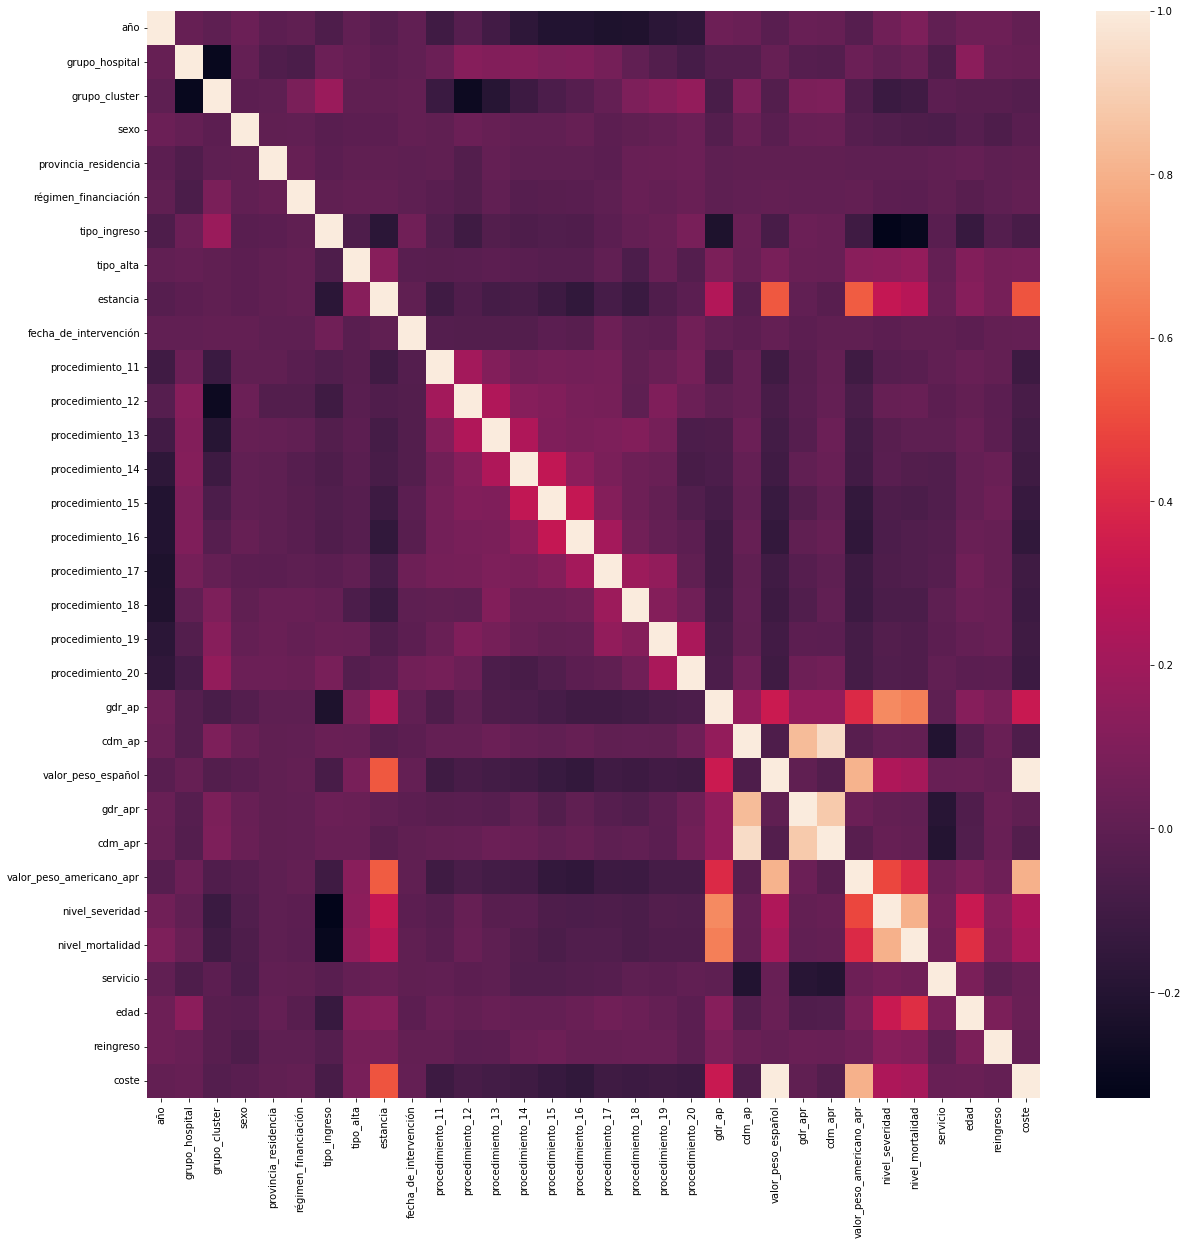

In [29]:
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr())

In [30]:
df.select_dtypes('number').describe()

,año,grupo_hospital,grupo_cluster,sexo,provincia_residencia,régimen_financiación,tipo_ingreso,tipo_alta,estancia,fecha_de_intervención,procedimiento_11,procedimiento_12,procedimiento_13,procedimiento_14,procedimiento_15,procedimiento_16,procedimiento_17,procedimiento_18,procedimiento_19,procedimiento_20,gdr_ap,cdm_ap,valor_peso_español,gdr_apr,cdm_apr,valor_peso_americano_apr,nivel_severidad,nivel_mortalidad,servicio,edad,reingreso,coste
count,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,4.998000e+03,12341.000000,7648.000000,4976.000000,7378.000000,6064.000000,4901.000000,3990.000000,3357.000000,2780.000000,2123.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000
mean,2011.504729,3.069386,8.712382,1.385640,28.295345,1.108190,1.229322,1.148045,8.233792,1.601155e+07,89.994133,88.978576,89.173368,90.813866,90.658287,90.871745,90.641140,90.146235,90.557446,91.138337,339.322477,4.462391,0.927574,165.432335,4.482379,1.020586,2.408303,2.166997,0.990265,66.232373,0.129136,4326.082895
std,2.248531,0.963666,20.757274,0.486806,5.048316,0.773977,0.505773,0.709761,10.094767,8.673040e+06,11.674164,13.366136,12.870377,9.212901,9.544991,9.400413,9.454177,9.762235,8.079143,7.419758,240.095403,2.991342,1.166974,128.710834,2.995818,0.947053,0.891282,0.967887,0.098184,17.506537,0.335351,5533.796695
min,2008.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.012013e+06,0.120000,0.140000,0.120000,0.140000,0.140000,0.140000,0.140000,0.140000,0.140000,0.140000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,2.000000,3.000000,1.000000,28.000000,1.000000,1.000000,1.000000,3.000000,9.022010e+06,89.390000,88.927500,89.370000,89.170000,89.370000,89.520000,89.520000,89.370000,89.370000,89.520000,88.000000,4.000000,0.634600,136.000000,4.000000,0.607200,2.000000,1.000000,1.000000,57.000000,0.000000,3020.730000
50%,2012.000000,3.000000,4.000000,1.000000,28.000000,1.000000,1.000000,1.000000,6.000000,1.608201e+07,90.490000,90.420000,90.460000,90.410000,90.310000,90.490000,90.420000,90.410000,90.410000,90.590000,539.000000,4.000000,0.830500,140.000000,4.000000,0.905700,3.000000,2.000000,1.000000,70.000000,0.000000,4040.280000
75%,2013.000000,4.000000,5.000000,2.000000,28.000000,1.000000,1.000000,1.000000,10.000000,2.311201e+07,93.960000,93.940000,93.940000,93.960000,93.960000,93.960000,93.940000,92.180000,92.140000,93.940000,541.000000,4.000000,0.949800,141.000000,4.000000,1.047400,3.000000,3.000000,1.000000,79.000000,0.000000,4584.570000
max,2015.000000,4.000000,99.000000,3.000000,99.000000,9.000000,9.000000,9.000000,623.000000,3.112201e+07,99.840000,99.990000,99.910000,99.990000,99.840000,99.940000,99.840000,99.840000,99.840000,99.840000,901.000000,25.000000,23.036400,956.000000,25.000000,17.419400,4.000000,4.000000,1.000000,110.000000,1.000000,116051.540000


In [31]:
df.grupo_hospital.value_counts(dropna=False)

4    60908
3    38661
2    31607
1     9761
Name: grupo_hospital, dtype: int64

In [32]:
df.grupo_cluster.value_counts(dropna=False)

4     46866
5     41405
3     26713
2      7183
99     7056
1      5985
6      5729
Name: grupo_cluster, dtype: int64

In [33]:
df.provincia_residencia.value_counts(dropna=False)

28    137962
99       585
45       359
53       195
19       189
13       170
40       108
10       103
5         91
16        87
6         86
11        68
30        60
24        57
35        56
47        49
50        48
38        46
3         45
18        40
33        33
8         30
2         29
7         28
9         28
37        25
29        24
41        24
36        23
14        23
27        21
46        19
15        19
42        19
4         19
49        18
23        18
39        16
34        15
48        13
51        12
31        12
20        11
32        10
26        10
21         8
12         6
1          5
44         5
17         3
43         3
52         2
22         1
25         1
Name: provincia_residencia, dtype: int64

In [34]:
df.régimen_financiación.value_counts(dropna=False)

1    137449
3      1518
6       978
9       659
8       252
5        43
4        38
Name: régimen_financiación, dtype: int64

In [35]:
df.tipo_ingreso.value_counts(dropna=False)

1    110010
2     30728
9       199
Name: tipo_ingreso, dtype: int64

In [36]:
df.tipo_alta.value_counts(dropna=False)

1    133930
4      4824
2       875
5       557
3       453
9       298
Name: tipo_alta, dtype: int64

In [432]:
conditionlist = [
    (df['edad'] <= 12) ,
    (df['edad'] > 12) & (df['edad'] <=18),
    (df['edad'] >18) & (df['edad'] <=26),
    (df['edad'] >=27) & (df['edad'] <=59),
    (df['edad']>=60)]
choicelist = ['Niño','Adolescente', 'Joven', 'Adulto','Persona Mayor']
df['grupo_edad'] = np.select(conditionlist, choicelist, default='Not Specified')

<AxesSubplot:title={'center':'estancia'}, xlabel='[grupo_edad]'>

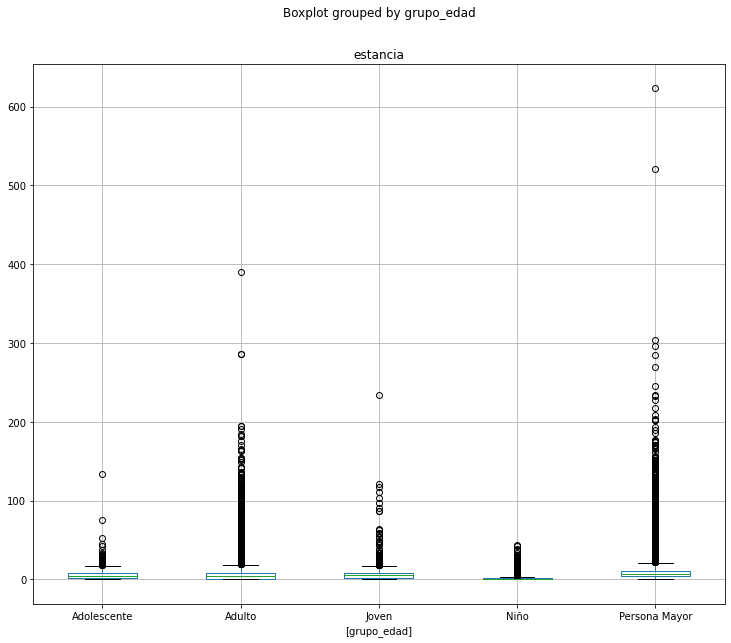

In [438]:
df[['grupo_edad','estancia']].boxplot(by='grupo_edad',figsize=(12,10))


In [39]:
df.corr()['edad'].sort_values(ascending=False)

edad                        1.000000
nivel_mortalidad            0.415884
nivel_severidad             0.328792
grupo_hospital              0.133830
gdr_ap                      0.120839
estancia                    0.118842
tipo_alta                   0.110591
valor_peso_americano_apr    0.087202
reingreso                   0.086420
servicio                    0.081427
procedimiento_17            0.053349
año                         0.040849
procedimiento_18            0.037230
procedimiento_16            0.032834
valor_peso_español          0.032685
coste                       0.032284
procedimiento_13            0.028031
procedimiento_11            0.024907
procedimiento_14            0.017342
procedimiento_15            0.016560
procedimiento_19            0.016062
provincia_residencia        0.015848
procedimiento_12            0.008433
fecha_de_intervención      -0.008170
procedimiento_20           -0.016498
grupo_cluster              -0.024309
régimen_financiación       -0.024833
s

In [40]:
df.corr()['estancia'].sort_values(ascending=False)

estancia                    1.000000
valor_peso_americano_apr    0.545374
valor_peso_español          0.532703
coste                       0.527187
nivel_severidad             0.312185
nivel_mortalidad            0.272019
gdr_ap                      0.253979
tipo_alta                   0.124386
edad                        0.118842
reingreso                   0.074027
servicio                    0.027488
régimen_financiación        0.009893
gdr_apr                     0.003686
fecha_de_intervención       0.001639
provincia_residencia        0.000313
grupo_cluster              -0.000623
sexo                       -0.009876
grupo_hospital             -0.011666
procedimiento_20           -0.015590
cdm_apr                    -0.023846
año                        -0.030515
cdm_ap                     -0.032888
procedimiento_19           -0.049988
procedimiento_12           -0.052130
procedimiento_14           -0.079313
procedimiento_17           -0.084788
procedimiento_13           -0.089891
p

In [41]:
df.corr()['coste'].sort_values(ascending=False)			

coste                       1.000000
valor_peso_español          0.996378
valor_peso_americano_apr    0.800385
estancia                    0.527187
gdr_ap                      0.328598
nivel_severidad             0.240144
nivel_mortalidad            0.215871
tipo_alta                   0.079083
edad                        0.032284
servicio                    0.027178
grupo_hospital              0.021125
reingreso                   0.016368
fecha_de_intervención       0.014243
régimen_financiación        0.011479
año                         0.010191
gdr_apr                     0.002322
provincia_residencia       -0.000938
sexo                       -0.019226
grupo_cluster              -0.038238
cdm_apr                    -0.041377
cdm_ap                     -0.056967
tipo_ingreso               -0.076619
procedimiento_12           -0.079736
procedimiento_13           -0.095565
procedimiento_19           -0.107013
procedimiento_17           -0.107273
procedimiento_14           -0.108115
p

In [42]:
df.corr()['valor_peso_español'].sort_values(ascending=False)

valor_peso_español          1.000000
coste                       0.996378
valor_peso_americano_apr    0.804885
estancia                    0.532703
gdr_ap                      0.332888
nivel_severidad             0.242389
nivel_mortalidad            0.216155
tipo_alta                   0.080082
edad                        0.032685
servicio                    0.027724
grupo_hospital              0.021226
reingreso                   0.015405
fecha_de_intervención       0.014758
régimen_financiación        0.011053
provincia_residencia        0.001664
gdr_apr                     0.001554
sexo                       -0.020847
año                        -0.022892
grupo_cluster              -0.038671
cdm_apr                    -0.042143
cdm_ap                     -0.058313
procedimiento_12           -0.075800
tipo_ingreso               -0.077084
procedimiento_13           -0.090691
procedimiento_19           -0.098724
procedimiento_17           -0.101713
procedimiento_14           -0.104873
p

In [43]:
df['ingreso_mes_año']=df.fecha_de_ingreso.dt.strftime('%m-%Y')

In [44]:
df.ingreso_mes_año=pd.to_datetime(df.ingreso_mes_año)

In [45]:
px.line(df.groupby('ingreso_mes_año').count().reset_index().sort_values('ingreso_mes_año'),x='ingreso_mes_año',y='fecha_de_ingreso')

In [46]:
features=['grupo_cluster','sexo','fecha_de_ingreso','tipo_ingreso','estancia','historia_recodificada','cip_recodificado','diagnóstico_principal','diagnóstico_2','procedimiento_1','valor_peso_español','nivel_severidad','nivel_mortalidad',	'servicio','edad','reingreso']

In [47]:
len(features)

16

<AxesSubplot:title={'center':'edad'}, xlabel='[tipo_ingreso]'>

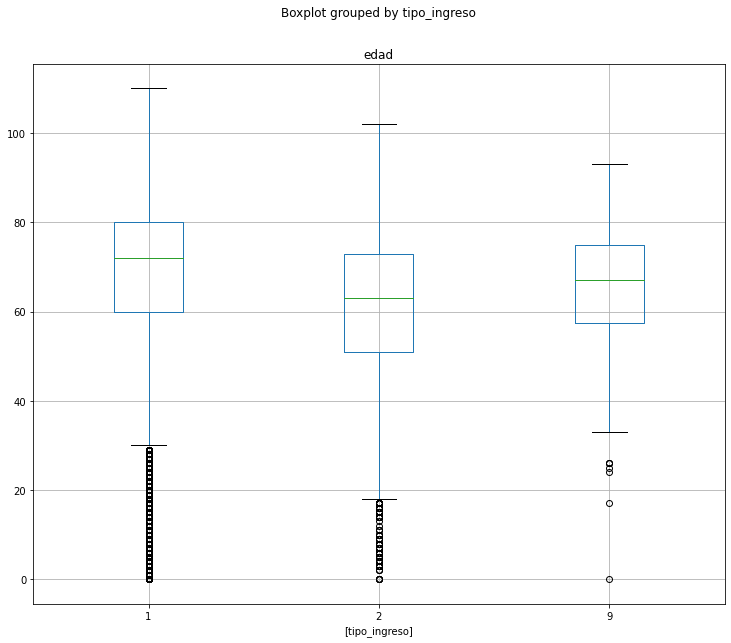

In [441]:
df[['tipo_ingreso','edad']].boxplot(by='tipo_ingreso',figsize=(12,10))

<AxesSubplot:title={'center':'estancia'}, xlabel='[sexo]'>

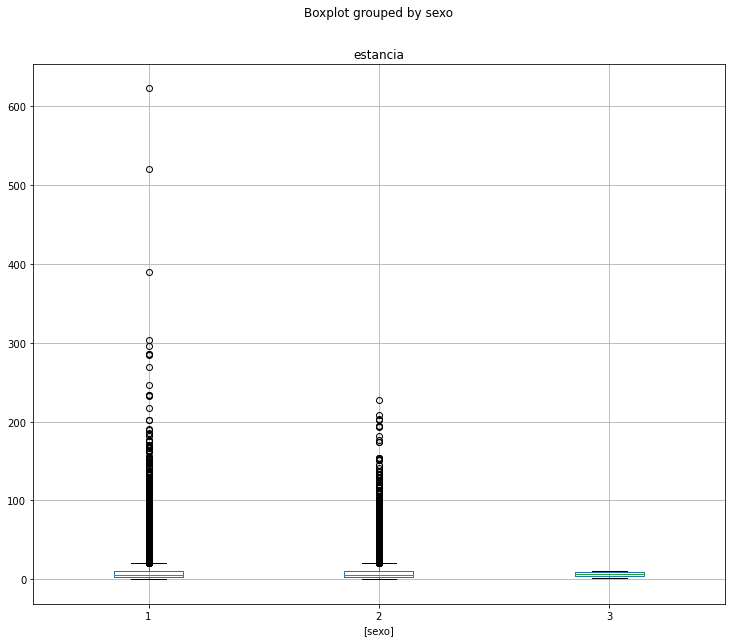

In [443]:
df[['estancia','sexo']].boxplot(by='sexo',figsize=(12,10))

In [471]:
px.bar(df[['nivel_severidad','sexo']].groupby(by='sexo').value_counts().reset_index().set_index(['sexo','nivel_severidad']).reset_index(),x='sexo',y=0,color='nivel_severidad')

In [49]:
df.ingreso_mes_año.value_counts()

2015-01-01    2226
2011-01-01    2134
2012-01-01    2130
2014-01-01    1887
2013-12-01    1879
              ... 
2007-12-01     549
2007-11-01      19
2007-10-01       3
2007-09-01       3
2007-08-01       2
Name: ingreso_mes_año, Length: 101, dtype: int64

In [50]:
df[features].head()

,grupo_cluster,sexo,fecha_de_ingreso,tipo_ingreso,estancia,historia_recodificada,cip_recodificado,diagnóstico_principal,diagnóstico_2,procedimiento_1,valor_peso_español,nivel_severidad,nivel_mortalidad,servicio,edad,reingreso
0,4,1,2013-10-30,1,14,-1687781257578748014,-320943158-171303395,428.0,NaN,39.96,0.9181,3,2,1,69,1
1,4,1,2013-03-19,1,6,166370745435838543,648485069584850511,491.21,NaN,90.42,0.9407,3,3,1,75,0
2,4,1,2013-11-15,1,11,183632305468848809,899288196-1988273609,428.0,NaN,90.42,0.9181,4,4,1,90,0
3,5,2,2013-04-28,1,16,2877111881585847151,-961279109-1723117644,428.1,NaN,88.72,0.9181,3,4,1,56,0
4,3,1,2013-02-07,2,1,17519509571482774643,-33451060035352825,162.5,NaN,33.26,0.9844,2,2,1,84,0


In [51]:
df=df[features]

<AxesSubplot:>

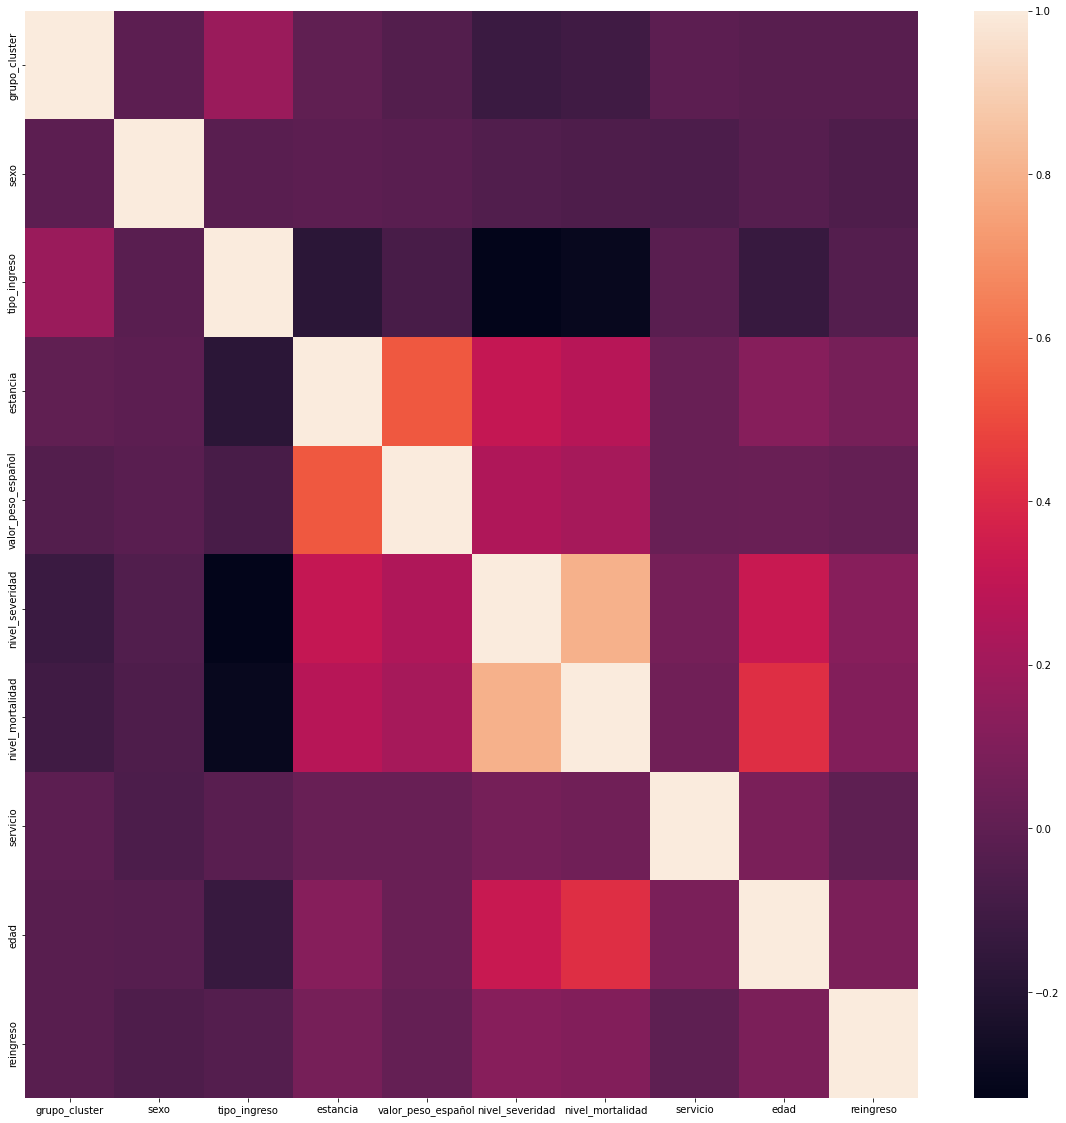

In [52]:
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr())

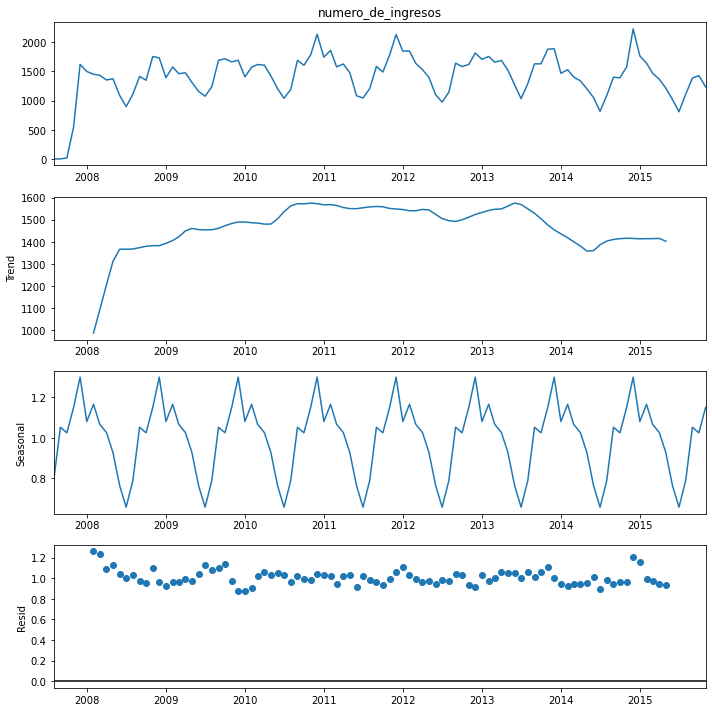

In [456]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_serie_temporal = df_def.loc[:,['fecha','numero_de_ingresos']]
df_serie_temporal['fecha'] = pd.to_datetime(df_serie_temporal['fecha'])
df_serie_temporal.set_index(keys='fecha',inplace=True)
df_serie_temporal.dropna(inplace=True)

estacionalidad = seasonal_decompose(
    df_serie_temporal['numero_de_ingresos'],
    model='multiplicative',
    period=12
)

fig = estacionalidad.plot()
fig.set_size_inches(10,10)
fig.tight_layout()
plt.show()

In [53]:
Ds = df_calidad_aire.columns[[x.startswith('D') for x in df_calidad_aire.columns]]

In [54]:
df_d = df_calidad_aire[Ds]

In [55]:
df_d.fillna(0,inplace=True)

C:\Users\carlo\AppData\Local\Temp/ipykernel_26136/1522000805.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
df_calidad_aire['value'] = df_d.mean(axis=1)

In [58]:
df_calidad_aire = df_calidad_aire[['PUNTO_MUESTREO','MAGNITUD','ANO','MES','value']]

In [59]:
df_calidad_aire['fecha'] = df_calidad_aire['ANO'].astype(str) + '-' + df_calidad_aire['MES'].astype(str)

C:\Users\carlo\AppData\Local\Temp/ipykernel_26136/2462284980.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
df_calidad_aire['fecha'] = pd.to_datetime(df_calidad_aire['fecha'])

C:\Users\carlo\AppData\Local\Temp/ipykernel_26136/1430271777.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
df_magnitud = df_calidad_aire.groupby(['MAGNITUD','fecha']).mean().reset_index()

In [62]:
px.line(df_magnitud,x='fecha',y='value',color='MAGNITUD')

In [63]:
magnitud_nombre={1:'Dióxido de Azufre',6:'Monóxido de Carbono',
  7:'Monóxido de Nitrógeno',  8:'Dióxido de Nitrógeno', 
   9:'Partículas menor 2.5 μm', 10:'Partículas menor 10 μm', 
   12:'Óxidos de Nitrógeno', 14:'Ozono', 20:'Tolueno', 
   30:'Benceno', 35:'Etilbenceno', 42:'Hidrocarburos totales (hexano)', 
   43:'Metano', 44:'Hidrocarburos no metánicos (hexano)'}

In [64]:
def set_values(row, value):
    return value[row]

In [65]:
df_magnitud['MAGNITUD_NOMBRE']=df_magnitud.MAGNITUD.apply(set_values,args=(magnitud_nombre,))

In [66]:
px.line(df_magnitud.reset_index(),x='fecha',y='value',color='MAGNITUD_NOMBRE')

In [67]:
df_umbrales = pd.read_excel('data/Umbrales.xlsx')

In [68]:
df_fin = df_magnitud.merge(df_umbrales, left_on='MAGNITUD',right_on='CODIGO', how='inner')

In [69]:
particulas=['Dióxido de Azufre','Monóxido de Carbono','Dióxido de Nitrógeno','Partículas menor 2,5 μm','Partículas menor 10 μm','Óxidos de Nitrógeno','Ozono','Benceno']

In [70]:
df_fin.drop(['CODIGO','MAGNITUD_y'],axis=1,inplace=True)

In [71]:
df_fin.columns = ['CODIGO','fecha','ANO','MES', 'value', 'PARTICULA', 'ABREVIATURA','MEDIDA','LIMITE', 'COMENTARIO']

In [72]:
df_fin.loc[(df_fin.CODIGO==12) & (df_fin.MES==8) & (df_fin.ANO==2013),'value'] = np.nan
df_fin.loc[(df_fin.CODIGO==12) & (df_fin.MES==8) & (df_fin.ANO==2013),'value'] = df_fin.loc[(df_fin.CODIGO==12) & (df_fin.MES==8)].value.mean()

In [73]:
df_fin.sample(20)

,CODIGO,fecha,ANO,MES,value,PARTICULA,ABREVIATURA,MEDIDA,LIMITE,COMENTARIO
100,1,2015-05-01,2015.0,5.0,5.206452,Dióxido de Azufre,SO3,μg/m 4,500,Alerta. Media horaria durante 3 horas consecut...
905,30,2010-06-01,2010.0,6.0,0.506452,Benceno,BEN,μg/m 3,5,Media anual
804,14,2011-01-01,2011.0,1.0,21.313364,Ozono,O3,μg/m 3,120,Máxima diaria de las medias móviles octohorari...
543,10,2011-08-01,2011.0,8.0,23.384409,Partículas menor 10 μm,PM10,μg/m 3,50,Media diaria. No podrá superarse en más de 35 ...
471,10,2008-08-01,2008.0,8.0,29.096774,Partículas menor 10 μm,PM10,μg/m 3,50,Media diaria. No podrá superarse en más de 35 ...
575,10,2012-12-01,2012.0,12.0,15.763441,Partículas menor 10 μm,PM10,μg/m 3,50,Media diaria. No podrá superarse en más de 35 ...
788,14,2009-09-01,2009.0,9.0,60.294931,Ozono,O3,μg/m 3,120,Máxima diaria de las medias móviles octohorari...
317,8,2015-06-01,2015.0,6.0,29.750000,Dióxido de Nitrógeno,NO3,μg/m 4,400,"Alerta. Media horaria, durante 3 horas consecu..."
421,9,2015-02-01,2015.0,2.0,7.096774,Partículas menor 2.5 μm,PM2.5,μg/m 3,25,Media anual
800,14,2010-09-01,2010.0,9.0,44.300248,Ozono,O3,μg/m 3,120,Máxima diaria de las medias móviles octohorari...


In [74]:
df['año_ingreso']=df.fecha_de_ingreso.dt.year
df['mes_ingreso']=df.fecha_de_ingreso.dt.month
df['dia_ingreso']=df.fecha_de_ingreso.dt.day
df['admission_date'] = df.fecha_de_ingreso

In [139]:
df_temperatura=df_temperatura[['fecha','tm_mes','hr','p_max','p_mes']]

In [140]:
df_temperatura.p_max=df_temperatura.p_max.str.slice(0,3).astype('float')

In [165]:
df_temperatura.fecha=pd.to_datetime(df_temperatura.fecha)

In [145]:
df_temperatura.tm_mes.interpolate(method="akima",inplace=True)
df_temperatura.hr.interpolate(method="akima",inplace=True)
df_temperatura.p_max.interpolate(method="akima",inplace=True)
df_temperatura.p_mes.interpolate(method="akima",inplace=True)

In [146]:
px.line(df_temperatura,x='fecha',y=['p_max','hr','p_mes','tm_mes'])

In [148]:
df_temperatura.rename(columns={'tm_mes':'temperatura_media_mes','hr':'humedad_relativa','p_max':'precipitaciones','p_mes':'presion_atmosferica_mes'},inplace=True)

## Diagnósticos

In [79]:
enfermedad_pulmonar_obstructiva_cronica = [
    '491.0', '491.1', '491.20', '491.21', '491.22', '491.8', '491.9', '492.0', '492.8', '494', '494.0', '494.1', '496'
]

bronquitis_aguda = [
    '466.0','490'
]

asma = [
    '493.00', '493.01', '493.02', '493.10', '493.11', '493.12', '493.20', '493.21', '493.22', '493.81', '493.82', '493.90', '493.91', '493.92'
]

fibrosis_quistica_o_anomalias_sistema_respiratorio = [
    '277.00', '277.01', '277.02','277.03', '277.09', '516.61','516.62', '516.63', '516.64', '516.69', '747.21', '748.3', '748.4', '748.5', '748.60', '748.61', '748.69', '748.8', '748.9', '750.3', '759.3','770.7'
]

insuficiencia_cardiaca_congestiva = [
    '398.91', '402.01', '402.11', '402.91', '404.01', '404.03', '404.11', '404.13', '404.91', '404.93', '428.0', '428.1', '428.20', '428.21', '428.22', '428.23', '428.30', '428.31', '428.32', '428.33', '428.40', '428.41', '428.42', '428.43', '428.9'
]

hipertension_arterial = [
    '401.0', '401.9', '402.00', '402.10', '402.90', '403.00', '403.10', '403.90', '404.00', '404.10', '404.90'
]

enfermedad_renal = [
    '403.00', '403.10', '403.90', '404.00', '404.10', '404.90'
]

neumonia_bacteriana = [
    '481', '482.2', '482.30', '482,31', '482.32', '482.39', '482.41', '482.42', '482.9', '483.0', '483.1', '483.8', '485', '486'
]

anemia_falciforme_o_enfermedad_hemoglobina_S = [
    '282.41', '282.42', '282.60', '282.61', '282.62', '282.63', '282.64', '282.68', '282.69'
]

diabetes_incontrolada_sin_complicacion = [
    '250.02','250.03'
]

diabetes_con_complicacion_aguda = [
    '250.10', '250,11', '250.12', '250.13', '250.20', '250.21','250.22','250.23', '250.30', '250.31', '250.32', '250.33'
]

diabetes_con_complicacion_cronica = [
    '250.40', '250.41', '250.42', '250.43', '250.50', '250.51', '250.52', '250.53', '250.60', '250.61', '250.62', '250.63', '250.70', '250.71', '250.72', '250.73', '250.80','250.81', '250.82', '250.83', '250.90', '250.91', '250.92', '250.93'
]

infarto_agudo_de_miocardio = [
    '410.01','410.11','410.21','410.31','410.41','410.51','410.71','410.81','410.90','410.91'
]

## Procedimientos

In [80]:
dialisis = [
    '38.95', '39.27', '39.29', '39.42', '39.43', '39.93', '39.94'
]

## Enfermedades

In [81]:
pqi_01_complicaciones_a_corto_plazo_de_la_diabetes = (
    (df['diagnóstico_principal'].isin(diabetes_con_complicacion_aguda))
    &
    (df['edad'] >= 15)
)

pqi_03_complicaciones_a_largo_plazo_de_la_diabetes = (
    (df['diagnóstico_principal'].isin(diabetes_con_complicacion_cronica))
    &
    (df['edad'] >= 15)
)

pqi_05_enfermedad_pulmonar_obstructiva_cronica_o_asma_en_mayores = (
    (
    (df['diagnóstico_principal'].isin(enfermedad_pulmonar_obstructiva_cronica)) |
    ((df['diagnóstico_principal'].isin(bronquitis_aguda)) & (df['diagnóstico_2'].isin(enfermedad_pulmonar_obstructiva_cronica))) |
    (df['diagnóstico_principal'].isin(asma))
    ) 
    & 
    (df['edad'] >= 40) 
    &
    ~(df['diagnóstico_2'].isin(fibrosis_quistica_o_anomalias_sistema_respiratorio))
)

pqi_07_hipertension_arterial = (
    (df['diagnóstico_principal'].isin(hipertension_arterial))
    &
    (df['edad'] >= 15)
    & 
    ~((df['diagnóstico_2'].isin(enfermedad_renal)) & (df['procedimiento_1'].isin(dialisis)) )
)

pqi_08_insuficiencia_cardiaca_congestiva  = (
    (df['diagnóstico_principal'].isin(insuficiencia_cardiaca_congestiva))
    &
    (df['edad'] >= 15) 
)

pqi_11_neumonia_bacteriana = (
    (df['diagnóstico_principal'].isin(neumonia_bacteriana))
    &
    (df['edad'] >= 15)
    & 
    ~(df['diagnóstico_2'].isin(anemia_falciforme_o_enfermedad_hemoglobina_S))
)

pqi_14_diabetes_incontrolada_sin_complicacion = (
    (df['diagnóstico_principal'].isin(diabetes_incontrolada_sin_complicacion))
    &
    (df['edad'] >= 15)
)

pqi_15_asma_en_adultos_jovenes_15_39_anos = (
    (df['diagnóstico_principal'].isin(asma))
    &
    ((df['edad'] >= 18) & (df['edad'] < 39))
    & 
    ~ (
        (df['diagnóstico_principal'].isin(fibrosis_quistica_o_anomalias_sistema_respiratorio))
        |
        (df['diagnóstico_2'].isin(fibrosis_quistica_o_anomalias_sistema_respiratorio))
    )
)

hospitalizacion_por_infarto_agudo_de_miocardio = (
    df['diagnóstico_principal'].isin(infarto_agudo_de_miocardio)
)

## Condiciones crónicas

In [82]:
complicaciones_a_corto_plazo_de_la_diabetes_en_poblacion_infantil = (
    (df['diagnóstico_principal'].isin(diabetes_con_complicacion_aguda))
    &
    ((df['edad'] >= 6) & (df['edad'] < 15))
)

hospitalizacion_por_asma_en_poblacion_infantil = (
    (df['diagnóstico_principal'].isin(asma))
    &
    ((df['edad'] >= 2) & (df['edad'] < 15))
    & 
    ~(
        (df['diagnóstico_principal'].isin(fibrosis_quistica_o_anomalias_sistema_respiratorio))
        |
        (df['diagnóstico_2'].isin(fibrosis_quistica_o_anomalias_sistema_respiratorio))
    )
)

In [83]:
diagnosis_dict = {
    'enfermedad pulmonar obstructiva cronica': enfermedad_pulmonar_obstructiva_cronica,
    'bronquitis aguda': bronquitis_aguda,
    'asma': asma,
    'fibrosis quistica o anomalias sistema respiratorio': fibrosis_quistica_o_anomalias_sistema_respiratorio,
    'insuficiencia cardiaca congestiva': insuficiencia_cardiaca_congestiva,
    'hipertension arterial': hipertension_arterial,
    'enfermedad renal': enfermedad_renal,
    'neumonia bacteriana': neumonia_bacteriana,
    'anemia falciforme o enfermedad hemoglobina S': anemia_falciforme_o_enfermedad_hemoglobina_S,
    'diabetes incontrolada sin complicacion': diabetes_incontrolada_sin_complicacion,
    'diabetes con complicacion aguda': diabetes_con_complicacion_aguda,
    'diabetes con complicacion cronica': diabetes_con_complicacion_cronica,
    'infarto agudo de miocardio': infarto_agudo_de_miocardio
}

for diagnosis, diagnosis_codes in diagnosis_dict.items():
    df.loc[
        df['diagnóstico_principal'].isin(diagnosis_codes),
        'diagnosis_name'
    ] = f'{diagnosis}'

df[['diagnóstico_principal','diagnosis_name']].head()

,diagnóstico_principal,diagnosis_name
0,428.0,insuficiencia cardiaca congestiva
1,491.21,enfermedad pulmonar obstructiva cronica
2,428.0,insuficiencia cardiaca congestiva
3,428.1,insuficiencia cardiaca congestiva
4,162.5,NaN


In [155]:
diagnosticos=list(diagnosis_dict.keys())
diagnosticos.append('fecha')
del diagnosticos[8]

In [85]:
diseases_filters_dict = {
    'PQI 01 complicaciones a corto plazo de la diabetes': pqi_01_complicaciones_a_corto_plazo_de_la_diabetes,
    'PQI 03 complicaciones a largo plazo de la diabetes': pqi_03_complicaciones_a_largo_plazo_de_la_diabetes,
    'PQI 05 enfermedad pulmonar obstructiva cronica o asma en mayores': pqi_05_enfermedad_pulmonar_obstructiva_cronica_o_asma_en_mayores,
    'PQI 07 hipertension arterial': pqi_07_hipertension_arterial,
    'PQI 08 insuficiencia cardiaca congestiva': pqi_08_insuficiencia_cardiaca_congestiva,
    'PQI 11 neumonia bacteriana': pqi_11_neumonia_bacteriana,
    'PQI 14 diabetes incontrolada sin complicacion': pqi_14_diabetes_incontrolada_sin_complicacion,
    'PQI 15 asma en adultos jovenes 15 39 anos': pqi_15_asma_en_adultos_jovenes_15_39_anos,
    'hospitalizacion por infarto agudo de miocardio': hospitalizacion_por_infarto_agudo_de_miocardio,
    'complicaciones a corto plazo de la diabetes en poblacion infantil': complicaciones_a_corto_plazo_de_la_diabetes_en_poblacion_infantil,
    'hospitalizacion por asma en poblacion infantil': hospitalizacion_por_asma_en_poblacion_infantil
}

for disease, disease_filter in diseases_filters_dict.items():
    df.loc[disease_filter, 'disease_name'] = f'{disease}'

In [86]:
campos_de_agrupacion = ['admission_date','diagnosis_name']
campos_de_registro_unico = ['historia_recodificada','cip_recodificado','fecha_de_ingreso']

fig = px.line(
    data_frame = df[campos_de_agrupacion + campos_de_registro_unico].groupby(campos_de_agrupacion).count().reset_index().rename(columns={"fecha_de_ingreso": "numero de ingresos"}),
    x = 'admission_date',
    y = 'numero de ingresos',
    color = 'diagnosis_name',
    title = 'Ingresos por diagnóstico',
    width = 1500, height = 800
)

fig.update_layout(hovermode="x")

In [87]:
campos_de_agrupacion = ['admission_date','disease_name']
campos_de_registro_unico = ['historia_recodificada','cip_recodificado','fecha_de_ingreso']

fig = px.line(
    data_frame = df[campos_de_agrupacion + campos_de_registro_unico].groupby(campos_de_agrupacion).count().reset_index().rename(columns={"fecha_de_ingreso": "numero de ingresos"}),
    x = 'admission_date',
    y = 'numero de ingresos',
    color = 'disease_name',
    title = 'Ingresos por enfermedad',
    width = 1500, height = 800
)

fig.update_layout(hovermode="x")

In [88]:
df=df.sort_values('fecha_de_ingreso')
df.head()

,grupo_cluster,sexo,fecha_de_ingreso,tipo_ingreso,estancia,historia_recodificada,cip_recodificado,diagnóstico_principal,diagnóstico_2,procedimiento_1,valor_peso_español,nivel_severidad,nivel_mortalidad,servicio,edad,reingreso,año_ingreso,mes_ingreso,dia_ingreso,admission_date,diagnosis_name,disease_name
16583,6,1,2007-08-02,2,166,-529045945-1318899342,00,011.93,292.9,87.44,2.015,2,1,1,37,0,2007,8,2,2007-08-02,NaN,NaN
12521,5,2,2007-08-20,2,193,-1710416977-1689576786,00,150.5,038.9,31.1,16.498,4,4,1,73,0,2007,8,20,2007-08-20,NaN,NaN
28366,4,1,2007-09-20,1,112,679077701190970178,00,394.0,041.19,31.1,16.498,4,4,1,76,0,2007,9,20,2007-09-20,NaN,NaN
47906,5,1,2007-09-20,1,127,15168214271531108233,00,860.0,038.9,00.17,16.498,4,4,1,79,0,2007,9,20,2007-09-20,NaN,NaN
60137,3,2,2007-09-29,1,109,1698874227-411547317,00,518.81,246.8,31.1,11.517,3,4,1,73,0,2007,9,29,2007-09-29,NaN,NaN


In [89]:
df_num_ingresos_diagnostico=df.groupby(['año_ingreso','mes_ingreso','diagnosis_name'])['admission_date'].count().reset_index().rename(columns={"admission_date": "numero_de_ingresos"})

In [208]:
df_num_ingresos=df.groupby(['año_ingreso','mes_ingreso'])['admission_date'].count().reset_index().rename(columns={"admission_date": "numero_de_ingresos"})

In [209]:
df_num_ingresos['fecha']=df_num_ingresos.año_ingreso.astype('str')+'-'+df_num_ingresos.mes_ingreso.astype('str')

In [210]:
df_num_ingresos.fecha=pd.to_datetime(df_num_ingresos.fecha,format='%Y-%m')

In [211]:
df_num_ingresos=df_num_ingresos[['fecha','numero_de_ingresos']]

In [212]:
df_num_ingresos.numero_de_ingresos=df_num_ingresos.numero_de_ingresos.shift(-1)

In [213]:
df_num_ingresos.dropna(inplace=True)

In [214]:
df_num_ingresos

,fecha,numero_de_ingresos
0,2007-08-01,3.0
1,2007-09-01,3.0
2,2007-10-01,19.0
3,2007-11-01,549.0
4,2007-12-01,1620.0
...,...,...
95,2015-07-01,810.0
96,2015-08-01,1109.0
97,2015-09-01,1384.0
98,2015-10-01,1427.0


In [97]:
df_num_ingresos_diagnostico['mes_ano']=df_num_ingresos_diagnostico.año_ingreso.astype('str')+'-'+df_num_ingresos_diagnostico.mes_ingreso.astype('str')

In [98]:
df_num_ingresos_diagnostico.mes_ano=pd.to_datetime(df_num_ingresos_diagnostico.mes_ano,format='%Y-%m')

In [99]:
df_num_ingresos_diagnostico_pivot=df_num_ingresos_diagnostico.pivot('mes_ano','diagnosis_name','numero_de_ingresos').reset_index()

In [100]:
df_magnitud.ANO=df_magnitud.ANO.astype('int')
df_magnitud.MES=df_magnitud.MES.astype('int')

In [215]:
df_merge=df_num_ingresos.merge(df_fin,on=['fecha'],how='inner')

In [216]:
df_merge.sample(20)

,fecha,numero_de_ingresos,CODIGO,ANO,MES,value,PARTICULA,ABREVIATURA,MEDIDA,LIMITE,COMENTARIO
188,2009-04-01,1475.0,30,2009.0,4.0,0.370968,Benceno,BEN,μg/m 3,5,Media anual
23,2007-10-01,19.0,10,2007.0,10.0,26.752688,Partículas menor 10 μm,PM10,μg/m 3,50,Media diaria. No podrá superarse en más de 35 ...
799,2014-12-01,2226.0,14,2014.0,12.0,21.509217,Ozono,O3,μg/m 3,120,Máxima diaria de las medias móviles octohorari...
90,2008-06-01,1089.0,1,2008.0,6.0,6.854839,Dióxido de Azufre,SO3,μg/m 4,500,Alerta. Media horaria durante 3 horas consecut...
434,2011-08-01,1205.0,8,2011.0,8.0,33.827957,Dióxido de Nitrógeno,NO3,μg/m 4,400,"Alerta. Media horaria, durante 3 horas consecu..."
884,2015-10-01,1427.0,8,2015.0,10.0,42.154570,Dióxido de Nitrógeno,NO3,μg/m 4,400,"Alerta. Media horaria, durante 3 horas consecu..."
335,2010-09-01,1690.0,8,2010.0,9.0,46.471248,Dióxido de Nitrógeno,NO3,μg/m 4,400,"Alerta. Media horaria, durante 3 horas consecu..."
464,2011-11-01,1778.0,10,2011.0,11.0,19.225806,Partículas menor 10 μm,PM10,μg/m 3,50,Media diaria. No podrá superarse en más de 35 ...
264,2010-01-01,1406.0,9,2010.0,1.0,10.096774,Partículas menor 2.5 μm,PM2.5,μg/m 3,25,Media anual
86,2008-05-01,1373.0,10,2008.0,5.0,21.553763,Partículas menor 10 μm,PM10,μg/m 3,50,Media diaria. No podrá superarse en más de 35 ...


In [103]:
px.line(df_merge,x='fecha',y=['value','LIMITE'],color='PARTICULA')

In [217]:
df_merge.drop(['COMENTARIO','ABREVIATURA','MEDIDA','ANO','MES'],axis=1,inplace=True)

In [218]:
df_merge.head(10)

,fecha,numero_de_ingresos,CODIGO,value,PARTICULA,LIMITE
0,2007-08-01,3.0,1,6.366935,Dióxido de Azufre,500
1,2007-08-01,3.0,6,0.234677,Monóxido de Carbono,10
2,2007-08-01,3.0,8,30.892473,Dióxido de Nitrógeno,400
3,2007-08-01,3.0,9,14.887097,Partículas menor 2.5 μm,25
4,2007-08-01,3.0,10,34.865591,Partículas menor 10 μm,40
5,2007-08-01,3.0,10,34.865591,Partículas menor 10 μm,50
6,2007-08-01,3.0,12,46.169355,Óxidos de Nitrógeno,30
7,2007-08-01,3.0,14,59.720430,Ozono,120
8,2007-08-01,3.0,30,0.375806,Benceno,5
9,2007-09-01,3.0,1,5.955645,Dióxido de Azufre,500


In [222]:
df_def=pd.pivot_table(df_merge,index='fecha',columns='PARTICULA',values='value').reset_index().merge(df_num_ingresos,on='fecha',how='left').merge(df_temperatura,on='fecha',how='left')

In [168]:
df_def[diagnosticos[:-1]]=df_def[diagnosticos[:-1]].shift(-1)

In [223]:
df_def['Benceno_1_mes']=df_def.Benceno.shift()
df_def['Benceno_2_meses']=df_def.Benceno.shift(2)
df_def['Benceno_3_meses']=df_def.Benceno.shift(3)
df_def['DióxidodDeAzufre_1_mes']=df_def['Dióxido de Azufre'].shift()
df_def['DióxidodDeAzufre_2_meses']=df_def['Dióxido de Azufre'].shift(2)
df_def['DióxidodDeAzufre_3_meses']=df_def['Dióxido de Azufre'].shift(3)
df_def['Ozono_1_mes']=df_def.Ozono.shift()
df_def['Ozono_2_meses']=df_def.Ozono.shift(2)
df_def['Ozono_3_meses']=df_def.Ozono.shift(3)
df_def['DióxidodDeNitrogeno_1_mes']=df_def['Dióxido de Nitrógeno'].shift()
df_def['DióxidodDeNitrogeno_2_meses']=df_def['Dióxido de Nitrógeno'].shift(2)
df_def['DióxidodDeNitrogeno_3_meses']=df_def['Dióxido de Nitrógeno'].shift(3)
df_def['MonoxidoDeCarbono_1_mes']=df_def['Monóxido de Carbono'].shift()
df_def['MonoxidoDeCarbono_2_meses']=df_def['Monóxido de Carbono'].shift(2)
df_def['MonoxidoDeCarbono_3_meses']=df_def['Monóxido de Carbono'].shift(3)
df_def['OxidosDeNitrogeno_1_mes']=df_def['Óxidos de Nitrógeno'].shift()
df_def['OxidosDeNitrogeno_2_meses']=df_def['Óxidos de Nitrógeno'].shift(2)
df_def['OxidosDeNitrogeno_3_meses']=df_def['Óxidos de Nitrógeno'].shift(3)
df_def['Particulas10_1_mes']=df_def['Partículas menor 10 μm'].shift()
df_def['Particulas10_2_meses']=df_def['Partículas menor 10 μm'].shift(2)
df_def['Particulas10_3_meses']=df_def['Partículas menor 10 μm'].shift(3)
df_def['Particulas2.5_1_mes']=df_def['Partículas menor 2.5 μm'].shift()
df_def['Particulas2.5_2_meses']=df_def['Partículas menor 2.5 μm'].shift(2)
df_def['Particulas2.5_3_meses']=df_def['Partículas menor 2.5 μm'].shift(3)

In [3]:
df_def=pd.read_csv('data/df_definitivo.csv')
df_def_diagnosticos=pd.read_csv('data/df_definitivo_por_diagnosticos.csv')

In [60]:
df_def.fecha=pd.to_datetime(df_def.fecha)
df_def_diagnosticos.fecha=pd.to_datetime(df_def_diagnosticos.fecha)

In [109]:
df_def['ingresos_año_anterior']=df_def.numero_de_ingresos.shift(12)
df_def['mes']=df_def.fecha.dt.month
df_def_diagnosticos['epoc_año_anterior']=df_def_diagnosticos['enfermedad pulmonar obstructiva cronica'].shift(12)
df_def_diagnosticos['nb_año_anterior']=df_def_diagnosticos['neumonia bacteriana'].shift(12)
df_def_diagnosticos['asma_año_anterior']=df_def_diagnosticos['asma'].shift(12)
df_def_diagnosticos['mes']=df_def_diagnosticos.fecha.dt.month

## Modelos por número de ingresos totales

## XGBoost

In [372]:
columns_X=['Benceno','Dióxido de Azufre','Dióxido de Nitrógeno','Monóxido de Carbono','Ozono','Partículas menor 10 μm','Partículas menor 2.5 μm','Óxidos de Nitrógeno',
	'Benceno_1_mes',	'Benceno_2_meses'	,'Benceno_3_meses',	'DióxidodDeAzufre_1_mes',	'DióxidodDeAzufre_2_meses',	'DióxidodDeAzufre_3_meses',	
    'Ozono_1_mes',	'Ozono_2_meses',	'Ozono_3_meses',	'DióxidodDeNitrogeno_1_mes',	'DióxidodDeNitrogeno_2_meses',	'DióxidodDeNitrogeno_3_meses',	
    'MonoxidoDeCarbono_1_mes',	'MonoxidoDeCarbono_2_meses',	'MonoxidoDeCarbono_3_meses',	'OxidosDeNitrogeno_1_mes',	'OxidosDeNitrogeno_2_meses',
    'OxidosDeNitrogeno_3_meses',	'Particulas10_1_mes',	'Particulas10_2_meses',	'Particulas10_3_meses','Particulas2.5_1_mes',	'Particulas2.5_2_meses',
    'Particulas2.5_3_meses','temperatura_media_mes','precipitaciones','presion_atmosferica_mes','humedad_relativa','ingresos_año_anterior','mes']
columns_y='numero_de_ingresos'
limite='2014-12-01'

X_train=df_def[ (~df_def[columns_y].isna()) & (df_def.fecha<=limite)][columns_X]
y_train=df_def[ (~df_def[columns_y].isna()) & (df_def.fecha<=limite)][columns_y]
X_test=df_def[ (~df_def[columns_y].isna()) & (df_def.fecha>limite)][columns_X]
y_test=df_def[ (~df_def[columns_y].isna()) & (df_def.fecha>limite)][columns_y]

In [373]:
df_num_ingresos=df_def[['fecha','numero_de_ingresos']]

In [306]:
px.line(df_def,x='fecha',y=['Benceno','Benceno_1_mes',	'Benceno_2_meses'	,'Benceno_3_meses'])

In [374]:
param_grid = {
    'n_estimators': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [375]:
model1=XGBRegressor()

In [376]:
cv = RandomizedSearchCV(model1, param_grid, cv = 5, verbose = True, n_jobs = -1)

In [377]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predicto

In [378]:
cv.best_score_,cv.best_params_

(0.4418139202281095,
 {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1})

In [389]:
final_model_xgb = XGBRegressor(**cv.best_params_)
final_model_xgb.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Text(0.5, 1.0, 'Feature Importance')

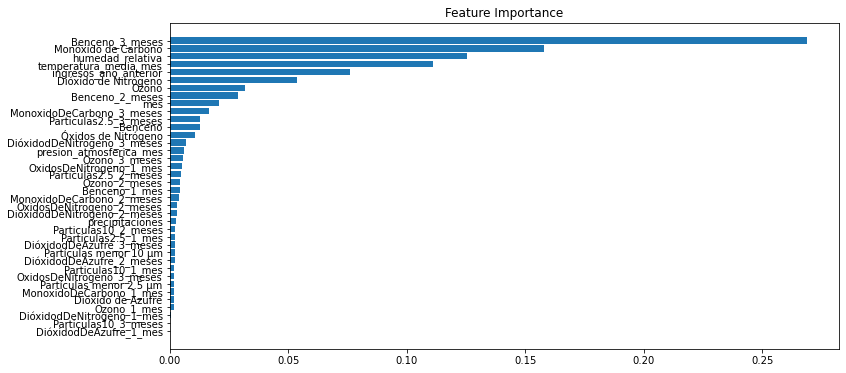

In [416]:
feature_importance = final_model_xgb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [412]:
final_model_xgb.fit(    X_train, 
    y_train, 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    early_stopping_rounds=10)

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[0]	validation_0-rmse:1333.34228	validation_1-rmse:1192.75537
[1]	validation_0-rmse:1205.36060	validation_1-rmse:1072.41077
[2]	validation_0-rmse:1090.22180	validation_1-rmse:964.16486
[3]	validation_0-rmse:986.86597	validation_1-rmse:858.26349
[4]	validation_0-rmse:893.59906	validation_1-rmse:772.15698
[5]	validation_0-rmse:809.71582	validation_1-rmse:693.06946
[6]	validation_0-rmse:734.11023	validation_1-rmse:620.89386
[7]	validation_0-rmse:666.07233	validation_1-rmse:554.15210
[8]	validation_0-rmse:604.98334	validation_1-rmse:495.19873
[9]	validation_0-rmse:549.82520	validation_1-rmse:449.96906
[10]	validation_0-rmse:499.98102	validation_1-rmse:402.01123
[11]	validation_0-rmse:455.08652	validation_1-rmse:357.23962
[12]	validation_0-rmse:414.39603	validation_1-rmse:323.25522
[13]	validation_0-rmse:377.70947	validation_1-rmse:296.75012
[14]	validation_0-rmse:344.37448	validation_1-rmse:274.52173
[15]	validation_0-rmse:314.45645	validation_1-rmse:252.59393
[16]	validation_0-rmse:286.94

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [413]:
preds0=final_model_xgb.predict(X_train)
preds1=final_model_xgb.predict(X_test)

In [414]:
rmse_xgb_train,mae_xgb_train,mape_xgb_train=np.sqrt(mean_squared_error(preds0,y_train)),mean_absolute_error(preds0,y_train),mean_absolute_percentage_error(preds0,y_train)
rmse_xgb_test, mae_xgb_test,mape_xgb_test=np.sqrt(mean_squared_error(preds1,y_test)),mean_absolute_error(preds1,y_test),mean_absolute_percentage_error(preds1,y_test)

In [415]:
errores_xgb_train=[ mae_xgb_train,mape_xgb_train,rmse_xgb_train]
errores_xgb_test=[ mae_xgb_test,mape_xgb_test,rmse_xgb_test]

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



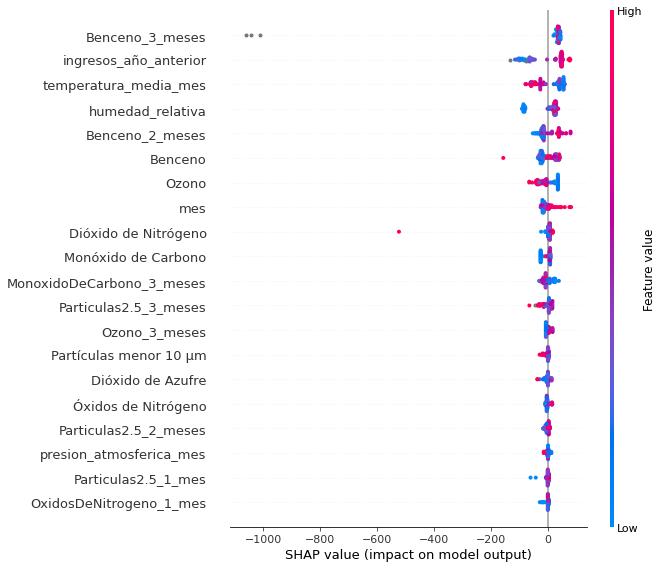

In [420]:
explainer = shap.TreeExplainer(final_model_xgb)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [407]:
df_num_ingresos['predicciones_xgb']=final_model_xgb.predict(pd.concat([X_train,X_test]).sort_index())

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\carlo\AppData\Local\Temp/ipykernel_1944/1948407400.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## CatBoost

In [80]:
model2=CatBoostRegressor()

In [81]:
param_grid = {
    'iterations': [10, 100,200],
    'depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [82]:
cv = RandomizedSearchCV(model2, param_grid, cv = 5, verbose = True, n_jobs = -1)

In [83]:
cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


One or more of the test scores are non-finite: [ 0.4181717          nan  0.288043   -0.22424206  0.4125628          nan
         nan  0.35938152         nan -0.15463536]


0:	learn: 384.7300842	total: 26.1ms	remaining: 5.19s
1:	learn: 370.7001193	total: 89.2ms	remaining: 8.83s
2:	learn: 357.4299673	total: 140ms	remaining: 9.19s
3:	learn: 342.5274400	total: 200ms	remaining: 9.78s
4:	learn: 328.2834286	total: 274ms	remaining: 10.7s
5:	learn: 315.6480408	total: 332ms	remaining: 10.7s
6:	learn: 304.3191548	total: 384ms	remaining: 10.6s
7:	learn: 293.1799600	total: 434ms	remaining: 10.4s
8:	learn: 284.5893914	total: 496ms	remaining: 10.5s
9:	learn: 275.0182406	total: 560ms	remaining: 10.6s
10:	learn: 266.0051507	total: 623ms	remaining: 10.7s
11:	learn: 256.8815785	total: 644ms	remaining: 10.1s
12:	learn: 250.6837087	total: 695ms	remaining: 9.99s
13:	learn: 242.2913672	total: 764ms	remaining: 10.1s
14:	learn: 235.0193428	total: 826ms	remaining: 10.2s
15:	learn: 227.1323925	total: 878ms	remaining: 10.1s
16:	learn: 219.9717498	total: 994ms	remaining: 10.7s
17:	learn: 212.5887483	total: 1.06s	remaining: 10.7s
18:	learn: 206.4996488	total: 1.09s	remaining: 10.4s
1

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000020367E2F880>,
                   n_jobs=-1,
                   param_distributions={'depth': [5, 10, 20],
                                        'iterations': [10, 100, 200],
                                        'learning_rate': [0.01, 0.001, 0.1, 1]},
                   verbose=True)

In [321]:
cv.best_score_,cv.best_params_

(0.4410504233467286,
 {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1})

In [85]:
final_model_cb=CatBoostRegressor(**cv.best_params_)
final_model_cb.fit(X_train,y_train)

0:	learn: 384.7300842	total: 30.3ms	remaining: 6.02s
1:	learn: 370.7001193	total: 136ms	remaining: 13.5s
2:	learn: 357.4299673	total: 216ms	remaining: 14.2s
3:	learn: 342.5274400	total: 304ms	remaining: 14.9s
4:	learn: 328.2834286	total: 371ms	remaining: 14.5s
5:	learn: 315.6480408	total: 439ms	remaining: 14.2s
6:	learn: 304.3191548	total: 531ms	remaining: 14.6s
7:	learn: 293.1799600	total: 613ms	remaining: 14.7s
8:	learn: 284.5893914	total: 664ms	remaining: 14.1s
9:	learn: 275.0182406	total: 725ms	remaining: 13.8s
10:	learn: 266.0051507	total: 808ms	remaining: 13.9s
11:	learn: 256.8815785	total: 829ms	remaining: 13s
12:	learn: 250.6837087	total: 885ms	remaining: 12.7s
13:	learn: 242.2913672	total: 943ms	remaining: 12.5s
14:	learn: 235.0193428	total: 1s	remaining: 12.4s
15:	learn: 227.1323925	total: 1.06s	remaining: 12.2s
16:	learn: 219.9717498	total: 1.12s	remaining: 12s
17:	learn: 212.5887483	total: 1.19s	remaining: 12s
18:	learn: 206.4996488	total: 1.21s	remaining: 11.5s
19:	learn: 

Text(0.5, 1.0, 'Feature Importance')

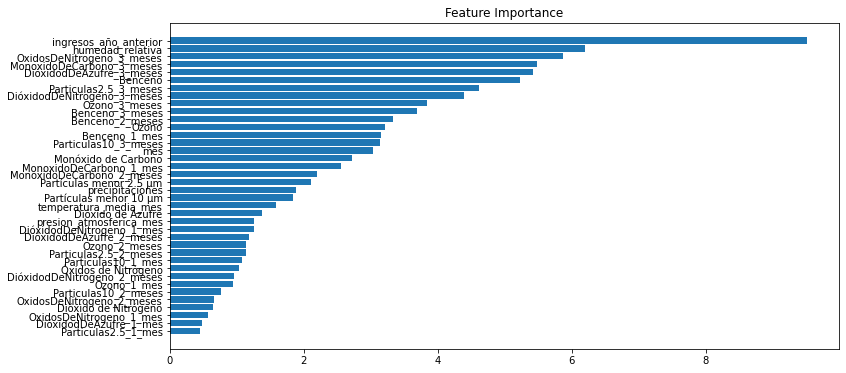

In [322]:
feature_importance = final_model_cb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [323]:
pred3=final_model_cb.predict(X_train)
pred2=final_model_cb.predict(X_test)

In [324]:
mae_cb_train,mape_cb_train,rmse_cb_train=mean_absolute_error(pred3,y_train),mean_absolute_percentage_error(pred3,y_train),np.sqrt(mean_squared_error(pred3,y_train))
mae_cb_test,mape_cb_test,rmse_cb_test=mean_absolute_error(pred2,y_test),mean_absolute_percentage_error(pred2,y_test),np.sqrt(mean_squared_error(pred2,y_test))

In [325]:
errores_cb_train=[mae_cb_train,mape_cb_train,rmse_cb_train]
errores_cb_test=[mae_cb_test,mape_cb_test,rmse_cb_test]

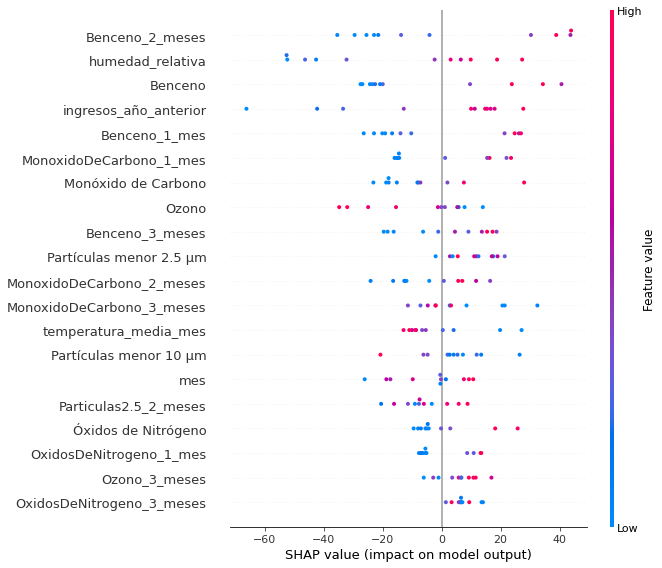

In [358]:
explainer = shap.TreeExplainer(final_model_cb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [396]:
df_num_ingresos['predicciones_cb']=final_model_cb.predict(pd.concat([X_train,X_test]).sort_index())

C:\Users\carlo\AppData\Local\Temp/ipykernel_1944/281832746.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## LightGBM

In [92]:
model3=LGBMRegressor()

In [93]:
param_grid = {
    'num_iterations': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [94]:
cv=RandomizedSearchCV(model3,param_grid,cv=5,n_jobs=-1)

In [95]:
cv.fit(X_train,y_train)

Found `num_iterations` in params. Will use it instead of argument


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.001, 0.1, 1],
                                        'max_depth': [5, 10, 20],
                                        'num_iterations': [10, 100, 200]})

In [96]:
cv.best_params_,cv.best_score_

({'num_iterations': 200, 'max_depth': 20, 'learning_rate': 0.1},
 0.34606050840924396)

In [97]:
final_model_lgb=LGBMRegressor(**cv.best_params_)
final_model_lgb.fit(X_train,y_train)

LGBMRegressor(max_depth=20, num_iterations=200)

Text(0.5, 1.0, 'Feature Importance')

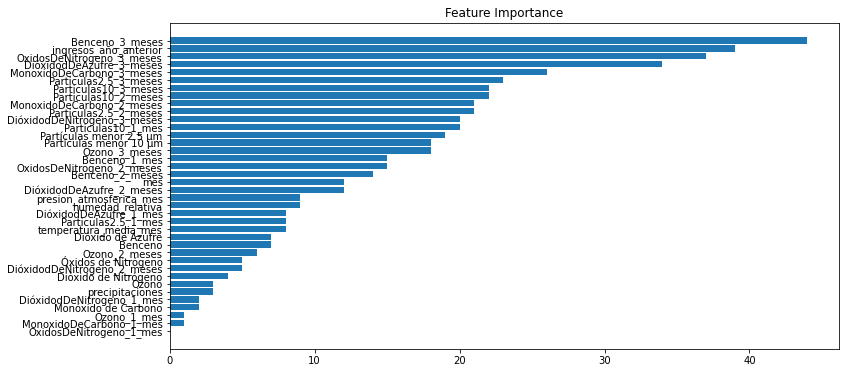

In [328]:
feature_importance = final_model_lgb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [329]:
pred5=final_model_lgb.predict(X_train)
pred4=final_model_lgb.predict(X_test)

In [330]:
mae_lgb_train,mape_lgb_train,rmse_lgb_train=mean_absolute_error(pred5,y_train),mean_absolute_percentage_error(pred5,y_train),np.sqrt(mean_squared_error(pred5,y_train))
mae_lgb_test,mape_lgb_test,rmse_lgb_test=mean_absolute_error(pred4,y_test),mean_absolute_percentage_error(pred4,y_test),np.sqrt(mean_squared_error(pred4,y_test))

In [331]:
errores_lgb_train=[mae_lgb_train,mape_lgb_train,rmse_lgb_train]
errores_lgb_test=[mae_lgb_test,mape_lgb_test,rmse_lgb_test]

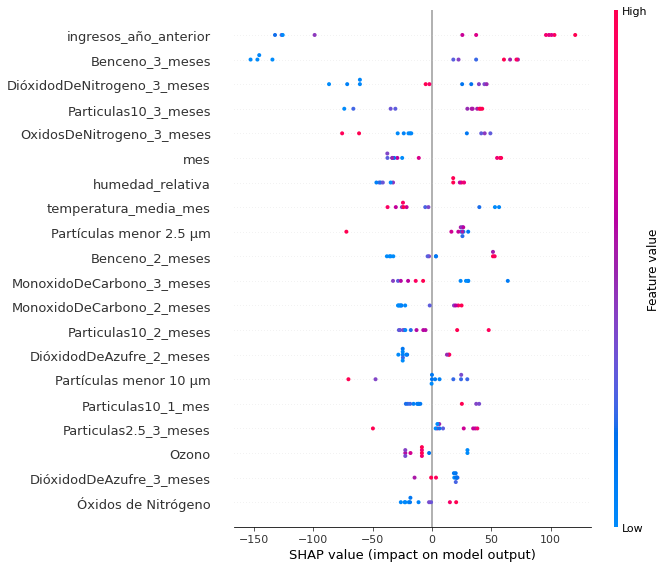

In [357]:
explainer = shap.TreeExplainer(final_model_lgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [417]:
df_errores_train=pd.DataFrame({'errores_xgb':errores_xgb_train,'errores_cb':errores_cb_train,'errores_lgb':errores_lgb_train},index=['MAE','MAPE','RMSE'])
df_errores_test=pd.DataFrame({'errores_xgb':errores_xgb_test,'errores_cb':errores_cb_test,'errores_lgb':errores_lgb_test},index=['MAE','MAPE','RMSE'])

In [398]:
df_num_ingresos['predicciones_lgbm']=final_model_lgb.predict(pd.concat([X_train,X_test]).sort_index())

C:\Users\carlo\AppData\Local\Temp/ipykernel_1944/3366779243.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [399]:
px.line(df_num_ingresos,x='fecha',y=['predicciones_lgbm','predicciones_cb','predicciones_xgb','numero_de_ingresos'])

In [418]:
df_errores_train

,errores_xgb,errores_cb,errores_lgb
MAE,89.679643,1.280790,35.933755
MAPE,0.069036,0.012095,0.055189
RMSE,112.094077,1.591872,48.998823


In [419]:
df_errores_test

,errores_xgb,errores_cb,errores_lgb
MAE,128.319081,96.540172,102.986099
MAPE,0.097658,0.072184,0.068846
RMSE,160.769568,140.034935,141.116852


## Estimación por diagnosticos: Enfermedad pulmonar obstructiva crónica (epoc), asma (a) y neumonia bacteriana (nb)

## XGBoost para enfermedad pulmonar obstructiva cronica

In [336]:
columns_X=['Benceno','Dióxido de Azufre','Dióxido de Nitrógeno','Monóxido de Carbono','Ozono','Partículas menor 10 μm','Partículas menor 2.5 μm','Óxidos de Nitrógeno',
	'Benceno_1_mes',	'Benceno_2_meses'	,'Benceno_3_meses',	'DióxidodDeAzufre_1_mes',	'DióxidodDeAzufre_2_meses',	'DióxidodDeAzufre_3_meses',	
    'Ozono_1_mes',	'Ozono_2_meses',	'Ozono_3_meses',	'DióxidodDeNitrogeno_1_mes',	'DióxidodDeNitrogeno_2_meses',	'DióxidodDeNitrogeno_3_meses',	
    'MonoxidoDeCarbono_1_mes',	'MonoxidoDeCarbono_2_meses',	'MonoxidoDeCarbono_3_meses',	'OxidosDeNitrogeno_1_mes',	'OxidosDeNitrogeno_2_meses',
    'OxidosDeNitrogeno_3_meses',	'Particulas10_1_mes',	'Particulas10_2_meses',	'Particulas10_3_meses','Particulas2.5_1_mes',	'Particulas2.5_2_meses',
    'Particulas2.5_3_meses','temperatura_media_mes','precipitaciones','presion_atmosferica_mes','humedad_relativa','epoc_año_anterior','mes']
columns_y='enfermedad pulmonar obstructiva cronica'

limite='2014-12-01'

X_train=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha<=limite)][columns_X]
y_train=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha<=limite)][columns_y]
X_test=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha>limite)][columns_X]
y_test=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha>limite)][columns_y]

In [337]:
df_num_ingresos_epoc=df_def_diagnosticos[['fecha','enfermedad pulmonar obstructiva cronica']]

In [338]:
df_num_ingresos_epoc.dropna(inplace=True)

C:\Users\carlo\AppData\Local\Temp/ipykernel_1944/2224907365.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [287]:
model1=XGBRegressor()

In [288]:
param_grid = {
    'n_estimators': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [289]:
cv=RandomizedSearchCV(model3,param_grid,cv=5,n_jobs=-1)

In [290]:
cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.001, 0.1, 1],
                                        'max_depth': [5, 10, 20],
                                        'n_estimators': [10, 100, 200]})

In [291]:
cv.best_params_,cv.best_score_

({'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1},
 0.48212390128694305)

In [292]:
final_model_xgb_epoc=XGBRegressor(**cv.best_params_)
final_model_xgb_epoc.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Text(0.5, 1.0, 'Feature Importance')

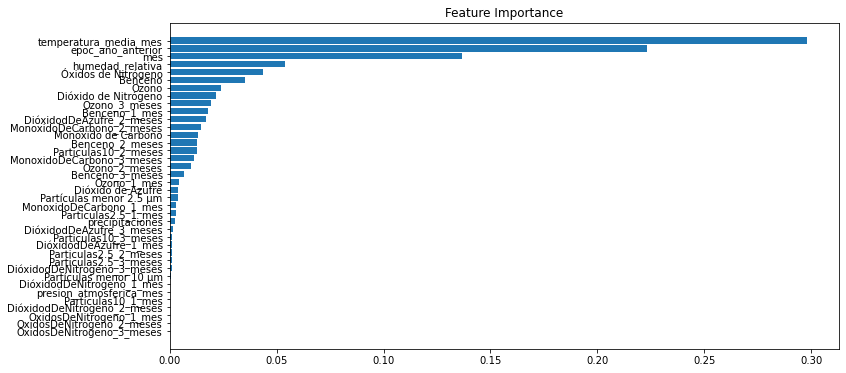

In [293]:
feature_importance = final_model_xgb_epoc.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [294]:
pred0_epoc=final_model_xgb_epoc.predict(X_train)
pred1_epoc=final_model_xgb_epoc.predict(X_test)

In [295]:
mae_xgb_epoc_train,mape_xgb_epoc_train,rmse_xgb_epoc_train=mean_absolute_error(pred0_epoc,y_train),mean_absolute_percentage_error(pred0_epoc,y_train),np.sqrt(mean_squared_error(pred0_epoc,y_train))
mae_xgb_epoc_test,mape_xgb_epoc_test,rmse_xgb_epoc_test=mean_absolute_error(pred1_epoc,y_test),mean_absolute_percentage_error(pred1_epoc,y_test),np.sqrt(mean_squared_error(pred1_epoc,y_test))

In [296]:
errores_xgb_epoc_train=[mae_xgb_epoc_train,mape_xgb_epoc_train,rmse_xgb_epoc_train]
errores_xgb_epoc_test=[mae_xgb_epoc_test,mape_xgb_epoc_test,rmse_xgb_epoc_test]

In [297]:
df_num_ingresos_epoc['predicciones_xgb']=final_model_xgb_epoc.predict(pd.concat([X_train,X_test]).sort_index())

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\carlo\AppData\Local\Temp/ipykernel_1944/4194797343.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Catboost para enfermedad pulmonar obstructiva cronica

In [133]:
model2=CatBoostRegressor()

In [134]:
param_grid = {
    'iterations': [10, 100,200],
    'depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [135]:
cv=RandomizedSearchCV(model2,param_grid,cv=5,n_jobs=-1)

In [136]:
cv.fit(X_train,y_train)

One or more of the test scores are non-finite: [ 0.23999201         nan -0.20834913  0.40736632  0.0611045  -0.24182274
         nan  0.53983227  0.08709262  0.3364769 ]


0:	learn: 102.6753082	total: 3.5ms	remaining: 697ms
1:	learn: 98.3489304	total: 7.5ms	remaining: 742ms
2:	learn: 93.5595682	total: 10ms	remaining: 657ms
3:	learn: 89.5648539	total: 12.5ms	remaining: 613ms
4:	learn: 85.5155154	total: 14.9ms	remaining: 582ms
5:	learn: 82.0415164	total: 18ms	remaining: 583ms
6:	learn: 78.1521096	total: 22.3ms	remaining: 615ms
7:	learn: 75.4756252	total: 25ms	remaining: 601ms
8:	learn: 72.9108864	total: 27.7ms	remaining: 588ms
9:	learn: 70.2656889	total: 30.3ms	remaining: 576ms
10:	learn: 67.5975079	total: 32.9ms	remaining: 565ms
11:	learn: 64.8698341	total: 37.6ms	remaining: 590ms
12:	learn: 62.9182643	total: 40.2ms	remaining: 578ms
13:	learn: 60.6820191	total: 42.8ms	remaining: 569ms
14:	learn: 58.9048031	total: 45.8ms	remaining: 565ms
15:	learn: 57.1385466	total: 48.7ms	remaining: 560ms
16:	learn: 55.5424238	total: 57.3ms	remaining: 617ms
17:	learn: 53.7481745	total: 60.2ms	remaining: 608ms
18:	learn: 52.0176589	total: 63.5ms	remaining: 605ms
19:	learn:

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x000002036A122C10>,
                   n_jobs=-1,
                   param_distributions={'depth': [5, 10, 20],
                                        'iterations': [10, 100, 200],
                                        'learning_rate': [0.01, 0.001, 0.1, 1]})

In [137]:
cv.best_params_,cv.best_score_

({'learning_rate': 0.1, 'iterations': 200, 'depth': 5}, 0.539832267758702)

In [138]:
final_model_cb_epoc=CatBoostRegressor(**cv.best_params_)
final_model_cb_epoc.fit(X_train,y_train)

0:	learn: 102.6753082	total: 5.54ms	remaining: 1.1s
1:	learn: 98.3489304	total: 13.1ms	remaining: 1.3s
2:	learn: 93.5595682	total: 17.3ms	remaining: 1.14s
3:	learn: 89.5648539	total: 22.2ms	remaining: 1.09s
4:	learn: 85.5155154	total: 28.1ms	remaining: 1.09s
5:	learn: 82.0415164	total: 31.9ms	remaining: 1.03s
6:	learn: 78.1521096	total: 37.6ms	remaining: 1.03s
7:	learn: 75.4756252	total: 42.5ms	remaining: 1.02s
8:	learn: 72.9108864	total: 51.8ms	remaining: 1.1s
9:	learn: 70.2656889	total: 61.4ms	remaining: 1.17s
10:	learn: 67.5975079	total: 79.1ms	remaining: 1.36s
11:	learn: 64.8698341	total: 94.7ms	remaining: 1.48s
12:	learn: 62.9182643	total: 105ms	remaining: 1.51s
13:	learn: 60.6820191	total: 112ms	remaining: 1.48s
14:	learn: 58.9048031	total: 141ms	remaining: 1.74s
15:	learn: 57.1385466	total: 147ms	remaining: 1.69s
16:	learn: 55.5424238	total: 156ms	remaining: 1.68s
17:	learn: 53.7481745	total: 162ms	remaining: 1.64s
18:	learn: 52.0176589	total: 170ms	remaining: 1.62s
19:	learn: 5

Text(0.5, 1.0, 'Feature Importance')

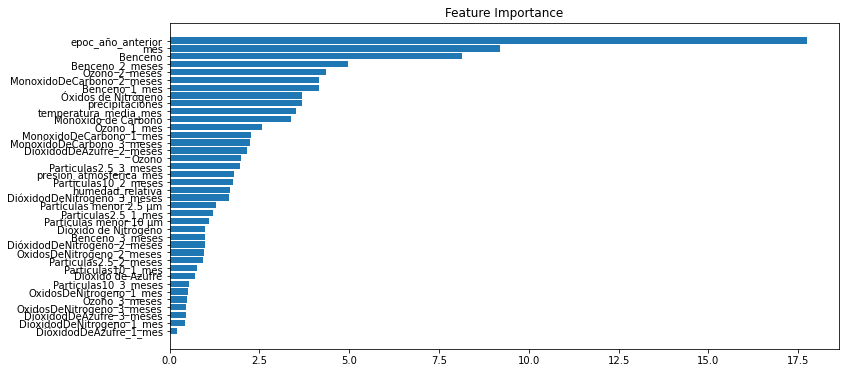

In [139]:
feature_importance = final_model_cb_epoc.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [140]:
pred3_epoc=final_model_cb_epoc.predict(X_train)
pred2_epoc=final_model_cb_epoc.predict(X_test)

In [141]:
mae_cb_epoc_train,mape_cb_epoc_train,rmse_cb_epoc_train=mean_absolute_error(pred3_epoc,y_train),mean_absolute_percentage_error(pred3_epoc,y_train),np.sqrt(mean_squared_error(pred3_epoc,y_train))
mae_cb_epoc_test,mape_cb_epoc_test,rmse_cb_epoc_test=mean_absolute_error(pred2_epoc,y_test),mean_absolute_percentage_error(pred2_epoc,y_test),np.sqrt(mean_squared_error(pred2_epoc,y_test))

In [142]:
errores_cb_epoc_train=[mae_cb_epoc_train,mape_cb_epoc_train,rmse_cb_epoc_train]
errores_cb_epoc_test=[mae_cb_epoc_test,mape_cb_epoc_test,rmse_cb_epoc_test]

In [298]:
df_num_ingresos_epoc['predicciones_cb']=final_model_cb_epoc.predict(pd.concat([X_train,X_test]).sort_index())

C:\Users\carlo\AppData\Local\Temp/ipykernel_1944/3182482037.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## LightGBM para enfermedad pulmonar obstructiva cronica

In [144]:
model3=LGBMRegressor()

In [145]:
param_grid = {
    'num_iterations': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [146]:
cv=RandomizedSearchCV(model3,param_grid,cv=5,n_jobs=-1)

In [147]:
cv.fit(X_train,y_train)

Found `num_iterations` in params. Will use it instead of argument


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.001, 0.1, 1],
                                        'max_depth': [5, 10, 20],
                                        'num_iterations': [10, 100, 200]})

In [148]:
cv.best_params_,cv.best_score_

({'num_iterations': 200, 'max_depth': 5, 'learning_rate': 0.1},
 0.48212390128694305)

In [149]:
final_model_lgb_epoc=LGBMRegressor(**cv.best_params_)
final_model_lgb_epoc.fit(X_train,y_train)

LGBMRegressor(max_depth=5, num_iterations=200)

Text(0.5, 1.0, 'Feature Importance')

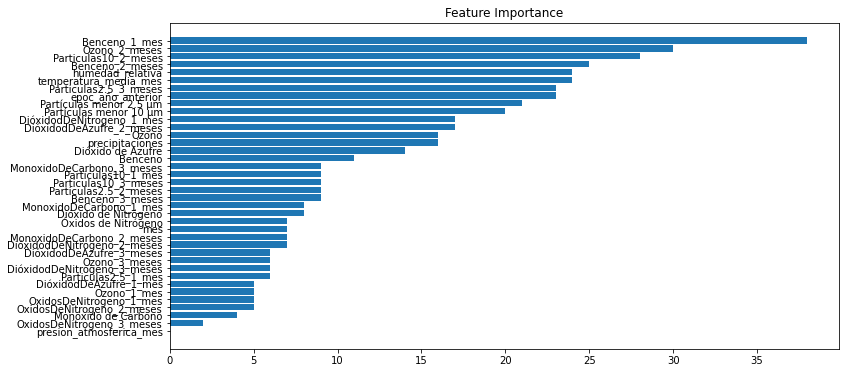

In [150]:
feature_importance = final_model_lgb_epoc.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [151]:
pred5_epoc=final_model_lgb_epoc.predict(X_train)
pred4_epoc=final_model_lgb_epoc.predict(X_test)

In [152]:
mae_lgb_epoc_train,mape_lgb_epoc_train,rmse_lgb_epoc_train=mean_absolute_error(pred5_epoc,y_train),mean_absolute_percentage_error(pred5_epoc,y_train),np.sqrt(mean_squared_error(pred5_epoc,y_train))
mae_lgb_epoc_test,mape_lgb_epoc_test,rmse_lgb_epoc_test=mean_absolute_error(pred4_epoc,y_test),mean_absolute_percentage_error(pred4_epoc,y_test),np.sqrt(mean_squared_error(pred4_epoc,y_test))

In [153]:
errores_lgb_epoc_train=[mae_lgb_epoc_train,mape_lgb_epoc_train,rmse_lgb_epoc_train]
errores_lgb_epoc_test=[mae_lgb_epoc_test,mape_lgb_epoc_test,rmse_lgb_epoc_test]

In [299]:
df_errores_epoc_train=pd.DataFrame({'errores_xgb_epoc':errores_xgb_epoc_train,'errores_cb_epoc':errores_cb_epoc_train,'errores_lgb_epoc':errores_lgb_epoc_train},index=['MAE','MAPE','RMSE'])
df_errores_epoc_test=pd.DataFrame({'errores_xgb_epoc':errores_xgb_epoc_test,'errores_cb_epoc':errores_cb_epoc_test,'errores_lgb_epoc':errores_lgb_epoc_test},index=['MAE','MAPE','RMSE'])

In [300]:
df_errores_epoc_train

,errores_xgb_epoc,errores_cb_epoc,errores_lgb_epoc
MAE,0.005906,1.570013,7.633358
MAPE,0.000023,0.006111,0.030747
RMSE,0.008106,2.003987,11.740734


In [301]:
df_errores_epoc_test

,errores_xgb_epoc,errores_cb_epoc,errores_lgb_epoc
MAE,56.715048,48.176864,43.747310
MAPE,0.166083,0.129715,0.127932
RMSE,83.360803,58.768099,59.260113


In [302]:
df_num_ingresos_epoc['predicciones_lgbm']=final_model_lgb_epoc.predict(pd.concat([X_train,X_test]).sort_index())

C:\Users\carlo\AppData\Local\Temp/ipykernel_1944/2543625712.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [303]:
px.line(df_num_ingresos_epoc,x='fecha',y=['enfermedad pulmonar obstructiva cronica','predicciones_xgb',	'predicciones_cb',	'predicciones_lgbm'])

## XGBoost para neumonia bacteriana

In [158]:
columns_X=['Benceno','Dióxido de Azufre','Dióxido de Nitrógeno','Monóxido de Carbono','Ozono','Partículas menor 10 μm','Partículas menor 2.5 μm','Óxidos de Nitrógeno',
	'Benceno_1_mes',	'Benceno_2_meses'	,'Benceno_3_meses',	'DióxidodDeAzufre_1_mes',	'DióxidodDeAzufre_2_meses',	'DióxidodDeAzufre_3_meses',	
    'Ozono_1_mes',	'Ozono_2_meses',	'Ozono_3_meses',	'DióxidodDeNitrogeno_1_mes',	'DióxidodDeNitrogeno_2_meses',	'DióxidodDeNitrogeno_3_meses',	
    'MonoxidoDeCarbono_1_mes',	'MonoxidoDeCarbono_2_meses',	'MonoxidoDeCarbono_3_meses',	'OxidosDeNitrogeno_1_mes',	'OxidosDeNitrogeno_2_meses',
    'OxidosDeNitrogeno_3_meses',	'Particulas10_1_mes',	'Particulas10_2_meses',	'Particulas10_3_meses','Particulas2.5_1_mes',	'Particulas2.5_2_meses',
    'Particulas2.5_3_meses','temperatura_media_mes','precipitaciones','presion_atmosferica_mes','humedad_relativa','nb_año_anterior','mes']
columns_y='neumonia bacteriana'

limite='2014-12-01'

X_train=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha<=limite)][columns_X]
y_train=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha<=limite)][columns_y]
X_test=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha>limite)][columns_X]
y_test=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha>limite)][columns_y]

In [159]:
df_num_ingresos_nb=df_def_diagnosticos[['fecha','neumonia bacteriana']]

In [160]:
df_num_ingresos_nb.dropna(inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [161]:
model1=XGBRegressor(random_state=42, min_sample_split = 20)

In [162]:
param_grid = {
    'n_estimators': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [163]:
cv=RandomizedSearchCV(model1,param_grid,cv=5,n_jobs=-1)

In [164]:
cv.fit(X_train,y_train)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[19:27:33] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "min_sample_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None,
                                          min_sample_split=20, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_paralle

In [165]:
cv.best_params_,cv.best_score_

({'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1},
 0.1386933734761778)

In [166]:
final_model_xgb_nb=XGBRegressor(random_state=42, min_sample_split = 20,**cv.best_params_)
final_model_xgb_nb.fit(X_train,y_train)

[19:27:33] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "min_sample_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, min_sample_split=20, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Text(0.5, 1.0, 'Feature Importance')

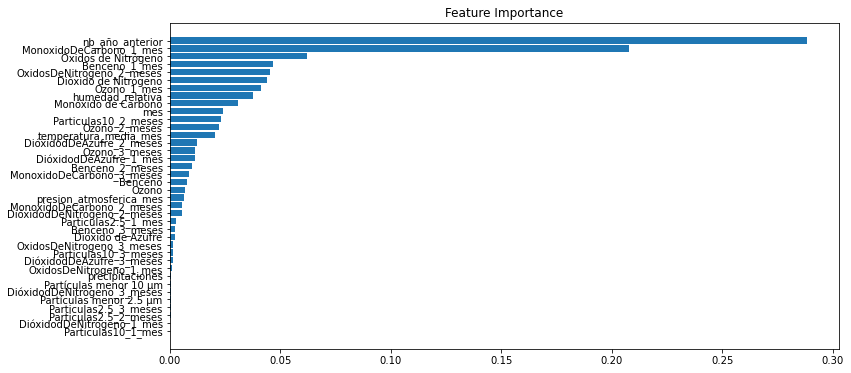

In [167]:
feature_importance = final_model_xgb_nb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [168]:
pred0_nb=final_model_xgb_nb.predict(X_train)
pred1_nb=final_model_xgb_nb.predict(X_test)

In [169]:
mae_xgb_nb_train,mape_xgb_nb_train,rmse_xgb_nb_train=mean_absolute_error(pred0_nb,y_train),mean_absolute_percentage_error(pred0_nb,y_train),np.sqrt(mean_squared_error(pred0_nb,y_train))
mae_xgb_nb_test,mape_xgb_nb_test,rmse_xgb_nb_test=mean_absolute_error(pred1_nb,y_test),mean_absolute_percentage_error(pred1_nb,y_test),np.sqrt(mean_squared_error(pred1_nb,y_test))

In [170]:
errores_xgb_nb_train=[mae_xgb_nb_train,mape_xgb_nb_train,rmse_xgb_nb_train]
errores_xgb_nb_test=[mae_xgb_nb_test,mape_xgb_nb_test,rmse_xgb_nb_test]

In [171]:
df_num_ingresos_nb['predicciones_xgb']=final_model_xgb_nb.predict(pd.concat([X_train,X_test]).sort_index())

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Catboost para neumonia bacteriana

In [172]:
model2=CatBoostRegressor()

In [173]:
param_grid = {
    'iterations': [10, 100,200],
    'depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [174]:
cv=RandomizedSearchCV(model2,param_grid,cv=5,n_jobs=-1)

In [175]:
cv.fit(X_train,y_train)

One or more of the test scores are non-finite: [ 0.07439148  0.25620995         nan -0.15688587  0.37557932         nan
         nan  0.26057575 -0.1880876  -0.06716033]


0:	learn: 56.5379336	total: 3.06ms	remaining: 303ms
1:	learn: 54.1549649	total: 7.26ms	remaining: 356ms
2:	learn: 51.8738725	total: 12.7ms	remaining: 412ms
3:	learn: 49.9393346	total: 16.8ms	remaining: 404ms
4:	learn: 48.0835949	total: 28.7ms	remaining: 545ms
5:	learn: 46.4193305	total: 35.9ms	remaining: 563ms
6:	learn: 44.4337620	total: 45.4ms	remaining: 603ms
7:	learn: 43.1438994	total: 56.6ms	remaining: 650ms
8:	learn: 41.8989798	total: 64ms	remaining: 647ms
9:	learn: 40.7926544	total: 73.1ms	remaining: 658ms
10:	learn: 39.4782278	total: 78.6ms	remaining: 636ms
11:	learn: 38.1846281	total: 85.8ms	remaining: 630ms
12:	learn: 37.2406578	total: 96.1ms	remaining: 643ms
13:	learn: 35.9776825	total: 100ms	remaining: 614ms
14:	learn: 35.0939153	total: 116ms	remaining: 660ms
15:	learn: 34.3383581	total: 122ms	remaining: 643ms
16:	learn: 33.4364242	total: 128ms	remaining: 627ms
17:	learn: 32.4472332	total: 134ms	remaining: 611ms
18:	learn: 31.4309479	total: 141ms	remaining: 603ms
19:	learn: 

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000020369976FD0>,
                   n_jobs=-1,
                   param_distributions={'depth': [5, 10, 20],
                                        'iterations': [10, 100, 200],
                                        'learning_rate': [0.01, 0.001, 0.1, 1]})

In [176]:
cv.best_params_,cv.best_score_

({'learning_rate': 0.1, 'iterations': 100, 'depth': 5}, 0.37557932097222707)

In [177]:
final_model_cb_nb=CatBoostRegressor(**cv.best_params_)
final_model_cb_nb.fit(X_train,y_train)

0:	learn: 56.5379336	total: 5.96ms	remaining: 590ms
1:	learn: 54.1549649	total: 9.26ms	remaining: 454ms
2:	learn: 51.8738725	total: 14.1ms	remaining: 455ms
3:	learn: 49.9393346	total: 23.9ms	remaining: 573ms
4:	learn: 48.0835949	total: 30.2ms	remaining: 574ms
5:	learn: 46.4193305	total: 35.8ms	remaining: 561ms
6:	learn: 44.4337620	total: 44.8ms	remaining: 595ms
7:	learn: 43.1438994	total: 67.2ms	remaining: 772ms
8:	learn: 41.8989798	total: 78.6ms	remaining: 794ms
9:	learn: 40.7926544	total: 86ms	remaining: 774ms
10:	learn: 39.4782278	total: 93.7ms	remaining: 758ms
11:	learn: 38.1846281	total: 100ms	remaining: 735ms
12:	learn: 37.2406578	total: 107ms	remaining: 715ms
13:	learn: 35.9776825	total: 122ms	remaining: 749ms
14:	learn: 35.0939153	total: 130ms	remaining: 736ms
15:	learn: 34.3383581	total: 140ms	remaining: 734ms
16:	learn: 33.4364242	total: 148ms	remaining: 721ms
17:	learn: 32.4472332	total: 161ms	remaining: 734ms
18:	learn: 31.4309479	total: 175ms	remaining: 745ms
19:	learn: 30

Text(0.5, 1.0, 'Feature Importance')

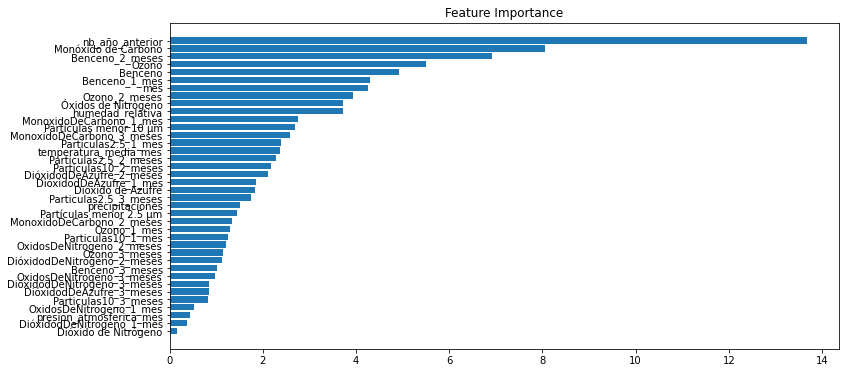

In [178]:
feature_importance = final_model_cb_nb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [179]:
pred3_nb=final_model_cb_nb.predict(X_train)
pred2_nb=final_model_cb_nb.predict(X_test)

In [180]:
mae_cb_nb_train,mape_cb_nb_train,rmse_cb_nb_train=mean_absolute_error(pred3_nb,y_train),mean_absolute_percentage_error(pred3_nb,y_train),np.sqrt(mean_squared_error(pred3_nb,y_train))
mae_cb_nb_test,mape_cb_nb_test,rmse_cb_nb_test=mean_absolute_error(pred2_nb,y_test),mean_absolute_percentage_error(pred2_nb,y_test),np.sqrt(mean_squared_error(pred2_nb,y_test))

In [181]:
errores_cb_nb_train=[mae_cb_nb_train,mape_cb_nb_train,rmse_cb_nb_train]
errores_cb_nb_test=[mae_cb_nb_test,mape_cb_nb_test,rmse_cb_nb_test]

In [182]:
df_num_ingresos_nb['predicciones_cb']=final_model_cb_nb.predict(pd.concat([X_train,X_test]).sort_index())


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## LightGBM para neumonia bacteriana

In [183]:
model3=LGBMRegressor()

In [184]:
param_grid = {
    'num_iterations': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [185]:
cv=RandomizedSearchCV(model3,param_grid,cv=5,n_jobs=-1)

In [186]:
cv.fit(X_train,y_train)

Found `num_iterations` in params. Will use it instead of argument


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.001, 0.1, 1],
                                        'max_depth': [5, 10, 20],
                                        'num_iterations': [10, 100, 200]})

In [187]:
cv.best_params_,cv.best_score_

({'num_iterations': 200, 'max_depth': 5, 'learning_rate': 0.01},
 0.35191631517472904)

In [188]:
final_model_lgb_nb=LGBMRegressor(**cv.best_params_)
final_model_lgb_nb.fit(X_train,y_train)

LGBMRegressor(learning_rate=0.01, max_depth=5, num_iterations=200)

Text(0.5, 1.0, 'Feature Importance')

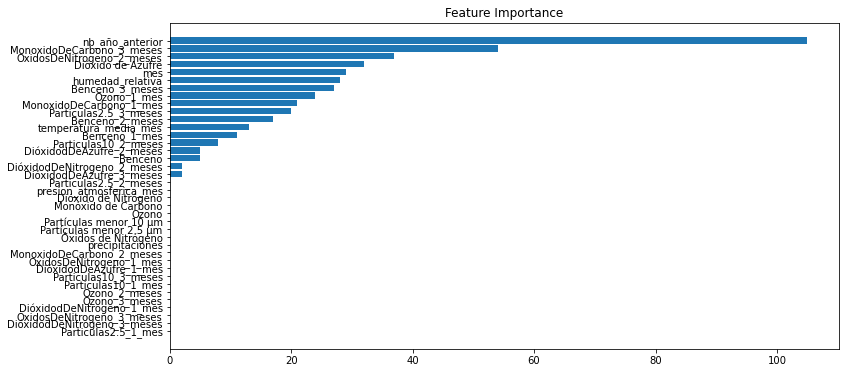

In [189]:
feature_importance = final_model_lgb_nb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [190]:
pred5_nb=final_model_lgb_nb.predict(X_train)
pred4_nb=final_model_lgb_nb.predict(X_test)

In [191]:
mae_lgb_nb_train,mape_lgb_nb_train,rmse_lgb_nb_train=mean_absolute_error(pred5_nb,y_train),mean_absolute_percentage_error(pred5_nb,y_train),np.sqrt(mean_squared_error(pred5_nb,y_train))
mae_lgb_nb_test,mape_lgb_nb_test,rmse_lgb_nb_test=mean_absolute_error(pred4_nb,y_test),mean_absolute_percentage_error(pred4_nb,y_test),np.sqrt(mean_squared_error(pred4_nb,y_test))

In [192]:
errores_lgb_nb_train=[mae_lgb_nb_train,mape_lgb_nb_train,rmse_lgb_nb_train]
errores_lgb_nb_test=[mae_lgb_nb_test,mape_lgb_nb_test,rmse_lgb_nb_test]

In [193]:
df_errores_nb_train=pd.DataFrame({'errores_xgb_nb':errores_xgb_nb_train,'errores_cb_nb':errores_cb_nb_train,'errores_lgb_nb':errores_lgb_nb_train},index=['MAE','MAPE','RMSE'])
df_errores_nb_test=pd.DataFrame({'errores_xgb_nb':errores_xgb_nb_test,'errores_cb_nb':errores_cb_nb_test,'errores_lgb_nb':errores_lgb_nb_test},index=['MAE','MAPE','RMSE'])

In [194]:
df_errores_nb_train

,errores_xgb_nb,errores_cb_nb,errores_lgb_nb
MAE,0.002182,5.658516,20.816352
MAPE,0.000012,0.037255,0.108803
RMSE,0.003065,7.068016,30.926599


In [195]:
df_errores_nb_test

,errores_xgb_nb,errores_cb_nb,errores_lgb_nb
MAE,26.501186,25.238864,29.053457
MAPE,0.126932,0.125507,0.147479
RMSE,35.506718,30.724196,33.756650


In [196]:
df_num_ingresos_nb['predicciones_lgbm']=final_model_lgb_nb.predict(pd.concat([X_train,X_test]).sort_index())


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [240]:
px.line(df_num_ingresos_nb,x='fecha',y=['neumonia bacteriana','predicciones_lgbm','predicciones_cb','predicciones_xgb'])

## XGBoost para asma

In [198]:
columns_X=['Benceno','Dióxido de Azufre','Dióxido de Nitrógeno','Monóxido de Carbono','Ozono','Partículas menor 10 μm','Partículas menor 2.5 μm','Óxidos de Nitrógeno',
	'Benceno_1_mes',	'Benceno_2_meses'	,'Benceno_3_meses',	'DióxidodDeAzufre_1_mes',	'DióxidodDeAzufre_2_meses',	'DióxidodDeAzufre_3_meses',	
    'Ozono_1_mes',	'Ozono_2_meses',	'Ozono_3_meses',	'DióxidodDeNitrogeno_1_mes',	'DióxidodDeNitrogeno_2_meses',	'DióxidodDeNitrogeno_3_meses',	
    'MonoxidoDeCarbono_1_mes',	'MonoxidoDeCarbono_2_meses',	'MonoxidoDeCarbono_3_meses',	'OxidosDeNitrogeno_1_mes',	'OxidosDeNitrogeno_2_meses',
    'OxidosDeNitrogeno_3_meses',	'Particulas10_1_mes',	'Particulas10_2_meses',	'Particulas10_3_meses','Particulas2.5_1_mes',	'Particulas2.5_2_meses',
    'Particulas2.5_3_meses','temperatura_media_mes','precipitaciones','presion_atmosferica_mes','humedad_relativa','asma_año_anterior','mes']
columns_y='asma'


limite='2014-12-01'

X_train=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha<=limite)][columns_X]
y_train=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha<=limite)][columns_y]
X_test=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha>limite)][columns_X]
y_test=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha>limite)][columns_y]

In [199]:
df_num_ingresos_a=df_def_diagnosticos[['fecha','asma']]

In [200]:
df_num_ingresos_a.dropna(inplace=True)

C:\Users\carlo\AppData\Local\Temp/ipykernel_1944/699617131.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [201]:
model1=XGBRegressor(random_state=42, min_sample_split = 20)

In [202]:
param_grid = {
    'n_estimators': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [203]:
cv=RandomizedSearchCV(model1,param_grid,cv=5,n_jobs=-1)

In [204]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[19:28:36] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "min_sample_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None,
                                          min_sample_split=20, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_paralle

In [205]:
cv.best_params_,cv.best_score_

({'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1},
 0.12519708151674105)

In [206]:
final_model_xgb_a=XGBRegressor(random_state=42, min_sample_split = 20,**cv.best_params_)
final_model_xgb_a.fit(X_train,y_train)

[19:28:36] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "min_sample_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, min_sample_split=20, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Text(0.5, 1.0, 'Feature Importance')

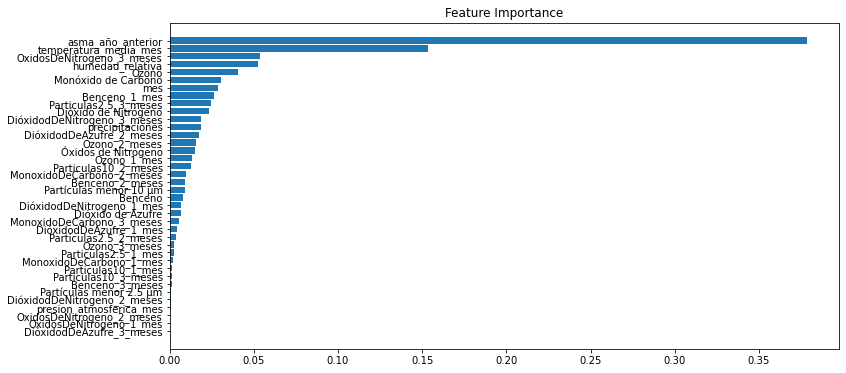

In [207]:
feature_importance = final_model_xgb_a.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [208]:
pred0_a=final_model_xgb_a.predict(X_train)
pred1_a=final_model_xgb_a.predict(X_test)

In [209]:
mae_xgb_a_train,mape_xgb_a_train,rmse_xgb_a_train=mean_absolute_error(pred0_a,y_train),mean_absolute_percentage_error(pred0_a,y_train),np.sqrt(mean_squared_error(pred0_a,y_train))
mae_xgb_a_test,mape_xgb_a_test,rmse_xgb_a_test=mean_absolute_error(pred1_a,y_test),mean_absolute_percentage_error(pred1_a,y_test),np.sqrt(mean_squared_error(pred1_a,y_test))

In [210]:
errores_xgb_a_train=[mae_xgb_a_train,mape_xgb_a_train,rmse_xgb_a_train]
errores_xgb_a_test=[mae_xgb_a_test,mape_xgb_a_test,rmse_xgb_a_test]

In [211]:
df_num_ingresos_a['predicciones_xgb']=final_model_xgb_a.predict(pd.concat([X_train,X_test]).sort_index())

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\carlo\AppData\Local\Temp/ipykernel_1944/3420313306.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## CatBoost para asma

In [212]:
model2=CatBoostRegressor()

In [213]:
param_grid = {
    'iterations': [10, 100,200],
    'depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [214]:
cv=RandomizedSearchCV(model2,param_grid,cv=5,n_jobs=-1)

In [215]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [ 0.13088875 -0.23812903  0.25133514  0.01643531  0.19862194 -0.17893343
  0.27847227         nan         nan -0.20912265]



0:	learn: 24.3110348	total: 10.4ms	remaining: 2.07s
1:	learn: 21.5847437	total: 17.3ms	remaining: 1.71s
2:	learn: 18.4995613	total: 25.4ms	remaining: 1.67s
3:	learn: 15.8842342	total: 33.2ms	remaining: 1.63s
4:	learn: 14.6339925	total: 42.5ms	remaining: 1.66s
5:	learn: 12.0183513	total: 55.6ms	remaining: 1.8s
6:	learn: 9.6581795	total: 62.1ms	remaining: 1.71s
7:	learn: 7.2175805	total: 72ms	remaining: 1.73s
8:	learn: 5.4994844	total: 81.1ms	remaining: 1.72s
9:	learn: 3.9406507	total: 88.5ms	remaining: 1.68s
10:	learn: 2.9632685	total: 101ms	remaining: 1.74s
11:	learn: 2.6664395	total: 109ms	remaining: 1.7s
12:	learn: 2.1472233	total: 118ms	remaining: 1.69s
13:	learn: 1.8154892	total: 124ms	remaining: 1.65s
14:	learn: 1.5012588	total: 129ms	remaining: 1.59s
15:	learn: 1.2410668	total: 139ms	remaining: 1.6s
16:	learn: 1.0810871	total: 146ms	remaining: 1.57s
17:	learn: 0.9217693	total: 154ms	remaining: 1.55s
18:	learn: 0.7522816	total: 160ms	remaining: 1.52s
19:	learn: 0.5997431	total: 18

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x000002036C4DC9D0>,
                   n_jobs=-1,
                   param_distributions={'depth': [5, 10, 20],
                                        'iterations': [10, 100, 200],
                                        'learning_rate': [0.01, 0.001, 0.1, 1]})

In [216]:
cv.best_params_,cv.best_score_

({'learning_rate': 1, 'iterations': 200, 'depth': 5}, 0.2784722739674449)

In [217]:
final_model_cb_a=CatBoostRegressor(**cv.best_params_)
final_model_cb_a.fit(X_train,y_train)

0:	learn: 24.3110348	total: 11.8ms	remaining: 2.36s
1:	learn: 21.5847437	total: 18.2ms	remaining: 1.8s
2:	learn: 18.4995613	total: 26ms	remaining: 1.71s
3:	learn: 15.8842342	total: 32.1ms	remaining: 1.57s
4:	learn: 14.6339925	total: 52.2ms	remaining: 2.04s
5:	learn: 12.0183513	total: 61.9ms	remaining: 2s
6:	learn: 9.6581795	total: 68.2ms	remaining: 1.88s
7:	learn: 7.2175805	total: 76.1ms	remaining: 1.82s
8:	learn: 5.4994844	total: 110ms	remaining: 2.34s
9:	learn: 3.9406507	total: 117ms	remaining: 2.22s
10:	learn: 2.9632685	total: 123ms	remaining: 2.12s
11:	learn: 2.6664395	total: 129ms	remaining: 2.03s
12:	learn: 2.1472233	total: 135ms	remaining: 1.94s
13:	learn: 1.8154892	total: 139ms	remaining: 1.84s
14:	learn: 1.5012588	total: 165ms	remaining: 2.03s
15:	learn: 1.2410668	total: 173ms	remaining: 1.99s
16:	learn: 1.0810871	total: 184ms	remaining: 1.98s
17:	learn: 0.9217693	total: 190ms	remaining: 1.92s
18:	learn: 0.7522816	total: 213ms	remaining: 2.03s
19:	learn: 0.5997431	total: 225ms

Text(0.5, 1.0, 'Feature Importance')

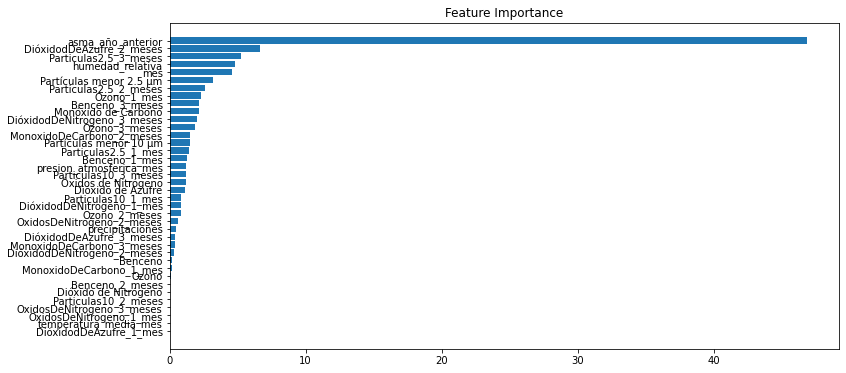

In [218]:
feature_importance = final_model_cb_a.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [219]:
pred3_a=final_model_cb_a.predict(X_train)
pred2_a=final_model_cb_a.predict(X_test)

In [220]:
mae_cb_a_train,mape_cb_a_train,rmse_cb_a_train=mean_absolute_error(pred3_a,y_train),mean_absolute_percentage_error(pred3_a,y_train),np.sqrt(mean_squared_error(pred3_a,y_train))
mae_cb_a_test,mape_cb_a_test,rmse_cb_a_test=mean_absolute_error(pred2_a,y_test),mean_absolute_percentage_error(pred2_a,y_test),np.sqrt(mean_squared_error(pred2_a,y_test))

In [221]:
errores_cb_a_train=[mae_cb_a_train,mape_cb_a_train,rmse_cb_a_train]
errores_cb_a_test=[mae_cb_a_test,mape_cb_a_test,rmse_cb_a_test]

In [222]:
df_num_ingresos_a['predicciones_cb']=final_model_cb_a.predict(pd.concat([X_train,X_test]).sort_index())

C:\Users\carlo\AppData\Local\Temp/ipykernel_1944/1054010735.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## LightGBM para asma

In [223]:
model3=LGBMRegressor()

In [224]:
param_grid = {
    'num_iterations': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [225]:
cv=RandomizedSearchCV(model3,param_grid,cv=5,n_jobs=-1)

In [226]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.001, 0.1, 1],
                                        'max_depth': [5, 10, 20],
                                        'num_iterations': [10, 100, 200]})

In [227]:
cv.best_params_,cv.best_score_

({'num_iterations': 100, 'max_depth': 20, 'learning_rate': 1},
 0.44706625577399883)

In [228]:
final_model_lgb_a=LGBMRegressor(**cv.best_params_)
final_model_lgb_a.fit(X_train,y_train)

LGBMRegressor(learning_rate=1, max_depth=20, num_iterations=100)

Text(0.5, 1.0, 'Feature Importance')

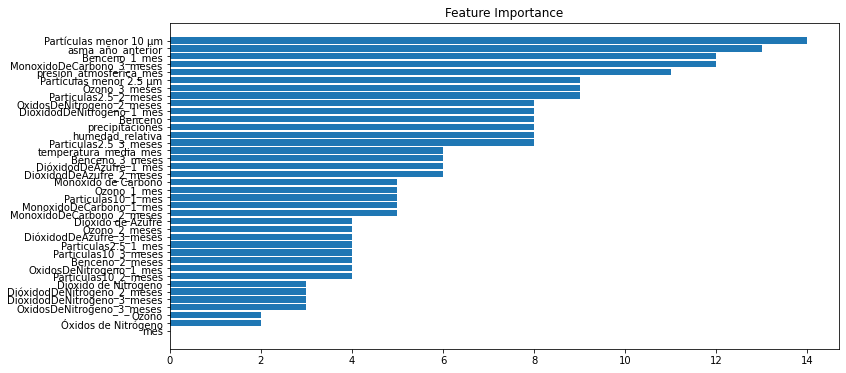

In [229]:
feature_importance = final_model_lgb_a.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [230]:
pred5_a=final_model_lgb_a.predict(X_train)
pred4_a=final_model_lgb_a.predict(X_test)

In [231]:
mae_lgb_a_train,mape_lgb_a_train,rmse_lgb_a_train=mean_absolute_error(pred5_a,y_train),mean_absolute_percentage_error(pred5_a,y_train),np.sqrt(mean_squared_error(pred5_a,y_train))
mae_lgb_a_test,mape_lgb_a_test,rmse_lgb_a_test=mean_absolute_error(pred4_a,y_test),mean_absolute_percentage_error(pred4_a,y_test),np.sqrt(mean_squared_error(pred4_a,y_test))

In [232]:
errores_lgb_a_train=[mae_lgb_a_train,mape_lgb_a_train,rmse_lgb_a_train]
errores_lgb_a_test=[mae_lgb_a_test,mape_lgb_a_test,rmse_lgb_a_test]

In [233]:
df_errores_a_train=pd.DataFrame({'errores_xgb_a':errores_xgb_a_train,'errores_cb_a':errores_cb_a_train,'errores_lgb_a':errores_lgb_a_train},index=['MAE','MAPE','RMSE'])
df_errores_a_test=pd.DataFrame({'errores_xgb_a':errores_xgb_a_test,'errores_cb_a':errores_cb_a_test,'errores_lgb_a':errores_lgb_a_test},index=['MAE','MAPE','RMSE'])

In [234]:
df_errores_a_train

,errores_xgb_a,errores_cb_a,errores_lgb_a
MAE,0.113094,8.774377e-14,0.230167
MAPE,0.001181,9.507221e-16,0.002874
RMSE,0.195858,1.201539e-13,0.328144


In [235]:
df_errores_a_test

,errores_xgb_a,errores_cb_a,errores_lgb_a
MAE,17.289150,11.136472,24.332252
MAPE,0.174466,0.128299,0.456200
RMSE,19.440139,14.283093,29.908891


In [236]:
df_num_ingresos_a['predicciones_lgbm']=final_model_lgb_a.predict(pd.concat([X_train,X_test]).sort_index())

C:\Users\carlo\AppData\Local\Temp/ipykernel_1944/3624501283.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [241]:
px.line(df_num_ingresos_a,x='fecha',y=['asma','predicciones_lgbm','predicciones_cb','predicciones_xgb'])